# The Impact of COVID-19 Era Data on Machine Learning Classification Accuracy When Predicting Crime Location in Washington, D.C. 
### DATA 602: Introduction to Data Analysis and Machine Learning
Authors: Joanne Choi, Sam Clark, Peter Kirk, William Simpson, Levan Sulimanov

Github: [DC Crime Analysis](https://github.com/joannechoi/DC-Crime-Analysis)

### Import libraries

In [1]:
#!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.0 MB/s 
     |████████████████████████████████| 6.3 MB 19.2 MB/s 
     |████████████████████████████████| 15.4 MB 26.7 MB/s 


In [ ]:
#!pip install geopy

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
import pandas as pd
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import geopandas as gpd
import openpyxl
from shapely.geometry import Point, Polygon
from pyproj import CRS
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import statsmodels.api as sm
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import sys
from statistics import mean
sys.setrecursionlimit(1500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Data & Preprocess Data
Following datasets were used to create the final dataset. The final dataset was exported as csv file before it was used for analysis. The data preprocessing code are commented out to save on computational time. 

In [ ]:
#DC crime incidents datasets between 2017-2021 from Open Data DC
# merged = pd.concat(
#    map(pd.read_csv, ['https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2017.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2018.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2019.csv',
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2020.csv', 
#                      'https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Crime_Incidents_in_2021.csv']), 
#                   ignore_index=True)

#download dataframe into a csv file
# merged.to_csv ('MergedData_2017-2021.csv', index = False, header=True)
# files.download("MergedData_2017-2021.csv")

#drop unnecessary columns
# df_crime = merged.drop(['X', 'Y', 'CCN', 'ANC', 'PSA', 'CENSUS_TRACT', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 
#                         'VOTING_PRECINCT', 'BID', 'OBJECTID',	'OCTO_RECORD_ID' ], axis = 1)

#DC Covid Statistics data
# df_covid_ward = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Total Cases by Ward', engine='openpyxl')
# df_covid_death = pd.read_excel('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/DC-COVID-19-Data-for-11-5-2021.xlsx', sheet_name = 'Lives Lost by Ward', engine='openpyxl')

#DC Police 
# df_sick_police = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/daily_count_police_out_due_to_covid.csv')

#DC metro station dataset from Open Data DC
# metro = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Metro_Stations_in_DC.csv')

#DC night club dataset from Open Data DC
# nightlife = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/Night_Club.csv')

#DC places of worship
# worship = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Raw/places_of_worship.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# cleanse crime incidents 

# del df_crime['REPORT_DAT']
# del df_crime['BLOCK']
# del df_crime['YBLOCK']
# del df_crime['XBLOCK']
# del df_crime['END_DATE']
# del df_crime['METHOD']
# del df_crime['DISTRICT']
# df_crime = df_crime.rename(columns = {'START_DATE':'date'})
# df_crime['date'] = pd.to_datetime(df_crime['date']).dt.date
# df_crime['date'] = pd.to_datetime(df_crime['date'])

# drop records with null records
# df_crime = df_crime.dropna(axis=0)

In [ ]:
# cleanse crime incidents 

# df_covid_ward = df_covid_ward.transpose()
# df_covid_ward.reset_index(drop = True, inplace= True)
# df_covid_ward.columns=('date', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'unknown')
# df_covid_ward = df_covid_ward.iloc[1: , :]
# df_covid_ward['date'] = pd.to_datetime(df_covid_ward['date'])
# df_covid_ward['total_cases'] = (df_covid_ward['ward_1'] + df_covid_ward['ward_2'] + df_covid_ward['ward_3'] + df_covid_ward['ward_4'] + df_covid_ward['ward_5'] + df_covid_ward['ward_6'] +df_covid_ward['ward_7'] + df_covid_ward['ward_8'] +df_covid_ward['unknown'])
# df_covid_ward['daily_cases'] = df_covid_ward['total_cases'].diff(1)

# del df_covid_ward['ward_1']
# del df_covid_ward['ward_2']
# del df_covid_ward['ward_3']
# del df_covid_ward['ward_4']
# del df_covid_ward['ward_5']
# del df_covid_ward['ward_6']
# del df_covid_ward['ward_7']
# del df_covid_ward['ward_8']
# del df_covid_ward['unknown']

# df_covid_ward.fillna(0, inplace=True)

In [ ]:
# cleanse death data

# df_covid_death = df_covid_death.transpose()
# df_covid_death.reset_index(drop = True, inplace= True)
# df_covid_death.columns=('date', 'all', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8', 'Experienced Homelessness', 'unknown', 'na')
# df_covid_death = df_covid_death.iloc[1: , :]
# df_covid_death['date'] = pd.to_datetime(df_covid_death['date'])
# df_covid_death['daily_death'] = df_covid_death['all'].diff(1)

# del df_covid_death['ward_1']
# del df_covid_death['ward_2']
# del df_covid_death['ward_3']
# del df_covid_death['ward_4']
# del df_covid_death['ward_5']
# del df_covid_death['ward_6']
# del df_covid_death['ward_7']
# del df_covid_death['ward_8']
# del df_covid_death['unknown']
# del df_covid_death['na']
# del df_covid_death['Experienced Homelessness']
# del df_covid_death['all']

# df_covid_death.fillna(0, inplace=True)

In [ ]:
# cleanse sick police

# df_sick_police = df_sick_police.rename(columns = {'DATE_REPORTED':'date'})
# df_sick_police['date'] = pd.to_datetime(df_sick_police['date'])

# df_sick_police.fillna(0, inplace=True)

In [ ]:
# merge the dataframes together
# merged = df_crime.merge(df_covid_ward, how='left', on = 'date').merge(df_covid_death, how='left', on = 'date').merge(df_sick_police, how='left', on = 'date')

# create dummy data

# getting weekday dummies
# merged['weekday'] = merged['date'].dt.dayofweek
# dummy0 = pd.get_dummies(merged['weekday'])
# dummy0.columns = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']
# merged = pd.concat([merged, dummy0] , axis = 1)
# del merged['weekday']

# # get month dummies
# merged['month'] = merged['date'].dt.month
# dummy1 = pd.get_dummies(merged['month'])
# dummy1.columns = ['JAN', 'FEB','MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']              
# merged = pd.concat([merged, dummy1] , axis = 1)
# del merged['month']

# # ward dummies
# dummy2 = pd.get_dummies(merged['WARD'])
# dummy2.columns = ['ward_1', 'ward_2','ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8']              
# merged = pd.concat([merged, dummy2] , axis = 1)

# # offense dummies
# dummy3 = pd.get_dummies(merged['OFFENSE'])
# merged = pd.concat([merged, dummy3] , axis = 1)

# # shift dummies
# dummies4 = pd.get_dummies(merged.SHIFT)
# merged = pd.concat([merged, dummies4], axis=1)

# # replace nan with 0
# merged.fillna(0, inplace=True)

In [ ]:
# creating new column for tuple of x and y coordinates
# merged['coords'] = tuple(zip(merged.LONGITUDE, merged.LATITUDE))
# metro['coords2'] = tuple(zip(metro.X, metro.Y))

In [ ]:
# join place of worship distance into crime data
# df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
# del df_metro_nightclub_worship['index']

In [ ]:
# calculate the distance between each crime incident to the closest metro stations

# distance_metro = []
# for index, row in merged.iterrows():
#    for index2, row2 in metro.iterrows():
#        x = geodesic(row['coords'], row2['coords2']).miles
#        z = [index, index2, x]
#        distance_metro.append(z)
# df = pd.DataFrame(distance_metro, columns = ['index', 'metro_stop_id', 'distance_metro'])
# df2 = df.groupby(['index'], as_index=False).agg({'distance_metro':'min'})

# merge metro distance from metro to main dataset

# df3 = pd.concat([merged, df2], axis=1)
# del df3['coords']
# del df3['index']

# calculate the distance between each crime incident to the closest nightlife location

# nightlife['coords3'] = tuple(zip(nightlife.LONGITUDE, nightlife.LATITUDE))
# distance_nightclubs = []
# for index, row in merged.iterrows():
#    for index2, row2 in nightlife.iterrows():
#        x = geodesic(row['coords'], row2['coords3']).miles
#        z = [index, index2, x]
#        distance_nightclubs.append(z)
# df = pd.DataFrame(distance_nightclubs, columns = ['index', 'nightclub_id', 'distance_nightclubs'])
# df_clubs = df.groupby(['index'], as_index=False).agg({'distance_nightclubs':'min'})

# merge nightclub distance from metro to main dataset

# df_metro_nightclub = pd.concat([df3, df_clubs], axis=1)
# del df_metro_nightclub['index']

# calculate the distance between each crime incident to the closest place of worship location

# worship['coords4'] = tuple(zip(worship.long, worship.lat))
# distance_worship = []
# for index, row in merged.iterrows():
#    for index2, row2 in worship.iterrows():
#        x = geodesic(row['coords'], row2['coords4']).miles
#        z = [index, index2, x]
#        distance_worship.append(z)
# df = pd.DataFrame(distance_worship, columns = ['index', 'worship_id', 'distance_worship'])
# df_worship = df.groupby(['index'], as_index=False).agg({'distance_worship':'min'})

# merge place of worship distance from metro to main dataset

# df_metro_nightclub_worship = pd.concat([df_metro_nightclub, df_worship], axis=1)
# del df_metro_nightclub_worship['index']

In [ ]:
# split data into covid not covid

# covid_start_date = pd.to_datetime("2020-03-11").date()
# df_metro_nightclub_worship['date'] = pd.to_datetime(df_metro_nightclub_worship['date']).dt.date

# pre_covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] <= covid_start_date)]
# covid_time = df_metro_nightclub_worship[(df_metro_nightclub_worship['date'] > covid_start_date)] 

In [ ]:
# export the dataframes to csv files

# pre_covid_time.to_csv(os.path.join(data_dir, 'precovid_crime_micro_geo_11_29_2021.csv'))
# covid_time.to_csv(os.path.join(data_dir, 'covid_crime_micro_geo_11_29_2021.csv'))

#### Import in the final dataset 

In [3]:
# import overall crime data
merged = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/MergedData_2017-2021.csv')

# import Pre-Covid and Covid datasets
precovid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/precovid_crime_micro_geo_11_29_2021.csv', index_col=False)
covid = pd.read_csv('https://raw.githubusercontent.com/joannechoi/DC-Crime-Analysis/main/Data/Merged/covid_crime_micro_geo_11_29_2021.csv', index_col=False)

print(precovid.shape)
print(covid.shape)

(104359, 53)
(43164, 53)


In [16]:
# shape datasets for crime hotspot analysis
border_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Washington_DC_Boundary.shp')
street_map = gpd.read_file('/content/drive/MyDrive/shapefiles/Roads.shp')

In [17]:
# preview of the precovid data
precovid.sample(5)

Unnamed: 0     SHIFT                     OFFENSE  WARD   LATITUDE  \
52748        52748       DAY  ASSAULT W/DANGEROUS WEAPON   5.0  38.901701   
100432      105182   EVENING                 THEFT/OTHER   4.0  38.938306   
24821        24821       DAY                THEFT F/AUTO   1.0  38.921231   
1893          1893  MIDNIGHT  ASSAULT W/DANGEROUS WEAPON   5.0  38.902208   
66824        66824   EVENING                 THEFT/OTHER   1.0  38.915572   

        LONGITUDE        date  total_cases  daily_cases  daily_death  \
52748  -76.976858  2018-02-11          0.0          0.0          0.0   
100432 -77.019019  2020-01-20          0.0          0.0          0.0   
24821  -77.019530  2017-06-06          0.0          0.0          0.0   
1893   -76.982012  2017-01-05          0.0          0.0          0.0   
66824  -77.026593  2019-02-18          0.0          0.0          0.0   

        OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
52748                             0.0   0   0   0   0   0   0   1    0    1   
100432                            0.0   1   0   0   0   0   0   0    1    0   
24821                             0.0   0   1   0   0   0   0   0    0    0   
1893                              0.0   0   0   0   1   0   0   0    1    0   
66824                             0.0   1   0   0   0   0   0   0    0    1   

        MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ward_1  ward_2  \
52748     0    0    0    0    0    0    0    0    0    0       0       0   
100432    0    0    0    0    0    0    0    0    0    0       0       0   
24821     0    0    0    1    0    0    0    0    0    0       1       0   
1893      0    0    0    0    0    0    0    0    0    0       0       0   
66824     0    0    0    0    0    0    0    0    0    0       1       0   

        ward_3  ward_4  ward_5  ward_6  ward_7  ward_8  ARSON  \
52748        0       0       1       0       0       0      0   
100432       0       1       0       0       0       0      0   
24821        0       0       0       0       0       0      0   
1893         0       0       1       0       0       0      0   
66824        0       0       0       0       0       0      0   

        ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
52748                            1         0         0                    0   
100432                           0         0         0                    0   
24821                            0         0         0                    0   
1893                             1         0         0                    0   
66824                            0         0         0                    0   

        ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
52748         0          0             0            0    1        0         0   
100432        0          0             0            1    0        1         0   
24821         0          0             1            0    1        0         0   
1893          0          0             0            0    0        0         1   
66824         0          0             0            1    0        1         0   

        distance_metro  distance_nightclubs  distance_worship  
52748         0.234859             0.250243          0.069468  
100432        0.308575             0.365504          0.060102  
24821         0.204767             0.301137          0.034899  
1893          0.406875             0.194858          0.047747  
66824         0.066673             0.165269          0.028222

In [18]:
# preview of the covid data
covid.sample(5)

Unnamed: 0     SHIFT              OFFENSE  WARD   LATITUDE  LONGITUDE  \
14821      116611   EVENING          THEFT/OTHER   2.0  38.910601 -77.052765   
11784      113439  MIDNIGHT          THEFT/OTHER   1.0  38.915410 -77.046303   
35569      139923   EVENING  MOTOR VEHICLE THEFT   7.0  38.862896 -76.949277   
3128       101163  MIDNIGHT         THEFT F/AUTO   6.0  38.905642 -77.007474   
9021       110559  MIDNIGHT  MOTOR VEHICLE THEFT   6.0  38.874334 -77.000537   

             date  total_cases  daily_cases  daily_death  \
14821  2020-11-10      18379.0        206.0          0.0   
11784  2020-07-10      10801.0         58.0          0.0   
35569  2021-09-08      56859.0        165.0          1.0   
3128   2020-12-01      21842.0        157.0          5.0   
9021   2020-07-18      11261.0         67.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
14821                           93.0   0   1   0   0   0   0   0    0    0   
11784                           94.0   0   0   0   0   1   0   0    0    0   
35569                           59.0   0   0   1   0   0   0   0    0    0   
3128                           198.0   0   1   0   0   0   0   0    0    0   
9021                           169.0   0   0   0   0   0   1   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ward_1  ward_2  \
14821    0    0    0    0    0    0    0    0    1    0       0       1   
11784    0    0    0    0    1    0    0    0    0    0       1       0   
35569    0    0    0    0    0    0    1    0    0    0       0       0   
3128     0    0    0    0    0    0    0    0    0    1       0       0   
9021     0    0    0    0    1    0    0    0    0    0       0       0   

       ward_3  ward_4  ward_5  ward_6  ward_7  ward_8  ARSON  \
14821       0       0       0       0       0       0      0   
11784       0       0       0       0       0       0      0   
35569       0       0       0       0       1       0      0   
3128        0       0       0       1       0       0      0   
9021        0       0       0       1       0       0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
14821                           0         0         0                    0   
11784                           0         0         0                    0   
35569                           0         0         0                    1   
3128                            0         0         0                    0   
9021                            0         0         0                    1   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
14821        0          0             0            1    0        1         0   
11784        0          0             0            1    0        0         1   
35569        0          0             0            0    0        1         0   
3128         0          0             1            0    0        0         1   
9021         0          0             0            0    0        0         1   

       distance_metro  distance_nightclubs  distance_worship  
14821        0.226588             0.254673          0.117390  
11784        0.219627             0.037650          0.026446  
35569        0.595296             1.825115          0.207400  
3128         0.122822             0.096205          0.098330  
9021         0.317489             0.514787          0.075946

### Exploratory Data Analysis

Crime count by type before Covid-19
------------------------------------
THEFT/OTHER                   46060
THEFT F/AUTO                  33638
MOTOR VEHICLE THEFT            7247
ROBBERY                        6560
ASSAULT W/DANGEROUS WEAPON     5193
BURGLARY                       4368
SEX ABUSE                       801
HOMICIDE                        472
ARSON                            20
Name: OFFENSE, dtype: int64


Crime count by type during Covid-19
------------------------------------
THEFT/OTHER                   16367
THEFT F/AUTO                  12809
MOTOR VEHICLE THEFT            5552
ROBBERY                        3168
ASSAULT W/DANGEROUS WEAPON     2636
BURGLARY                       2026
HOMICIDE                        332
SEX ABUSE                       261
ARSON                            13
Name: OFFENSE, dtype: int64


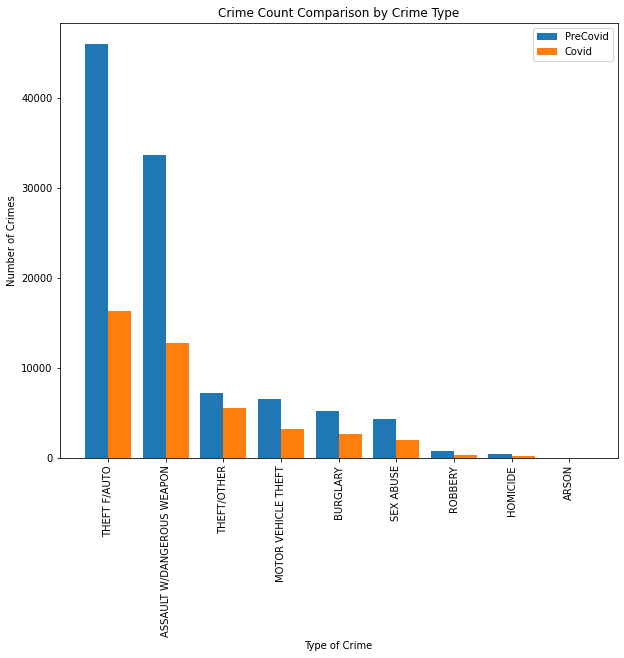

In [19]:
crimeTypes = precovid["OFFENSE"].unique()
precovid_types = precovid['OFFENSE'].value_counts()
covid_types = covid['OFFENSE'].value_counts()

print("Crime count by type before Covid-19")
print("------------------------------------")
print(precovid_types)
print('\n')
print("Crime count by type during Covid-19")
print("------------------------------------")
print(covid_types)

plt.figure(figsize=(10, 8))

x = np.arange(len(crimeTypes))
plt.bar(x - 0.2, precovid_types, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_types, 0.4, label = 'Covid')

plt.xticks(x, crimeTypes, rotation = 90)
plt.xlabel("Type of Crime")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Crime Type")
plt.legend()
plt.show()

Crime count by ward before Covid-19
------------------------------------
1.0    14776
2.0    19413
3.0     5908
4.0     9567
5.0    16016
6.0    16683
7.0    12540
8.0     9456
Name: WARD, dtype: int64


Crime count by ward during Covid-19
------------------------------------
1.0    5998
2.0    6712
3.0    2301
4.0    4101
5.0    6779
6.0    7683
7.0    5417
8.0    4173
Name: WARD, dtype: int64


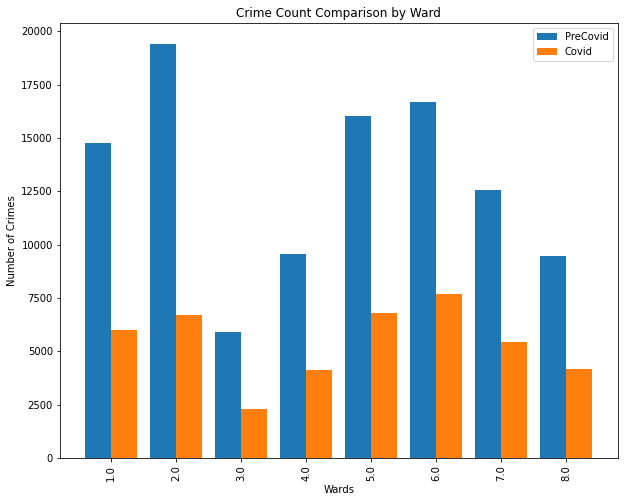

In [20]:
# view crime count by ward before and during covid
wards = precovid["WARD"].unique()
#x_wards = wards.sort()
precovid_wards = precovid['WARD'].value_counts().sort_index()
covid_wards = covid['WARD'].value_counts().sort_index()

print("Crime count by ward before Covid-19")
print("------------------------------------")
print(precovid_wards)
print('\n')
print("Crime count by ward during Covid-19")
print("------------------------------------")
print(covid_wards)

plt.figure(figsize=(10, 8))

x=np.arange(len(wards))
plt.bar(x - 0.2, precovid_wards, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, covid_wards, 0.4, label = 'Covid')

plt.xticks(x, sorted(wards), rotation = 90)
plt.xlabel("Wards")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Ward")
plt.legend()
plt.show()

#### Crime Hotspot Analysis 

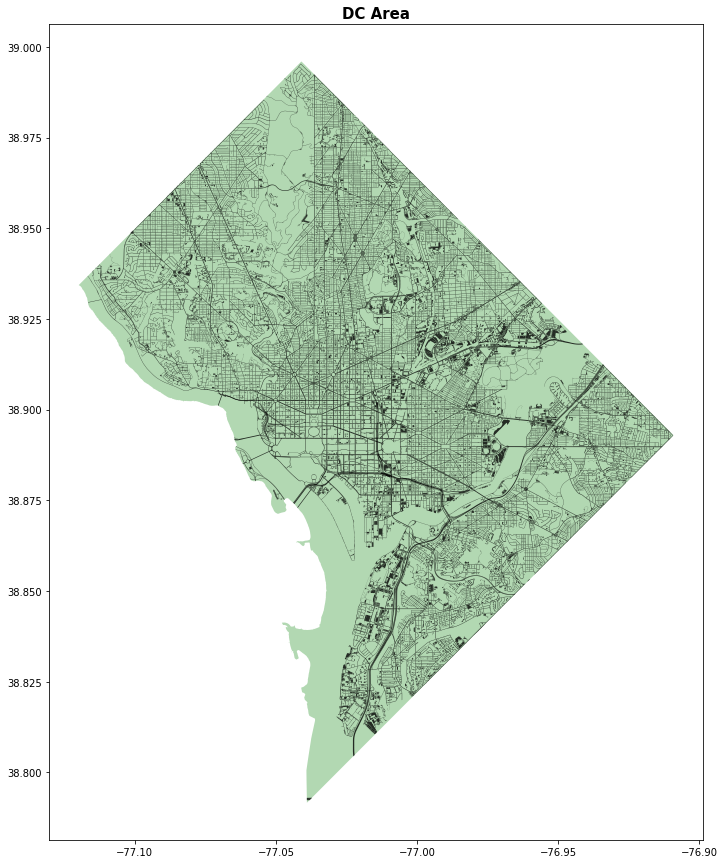

In [21]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.3, color='green')
street_map.plot(ax=ax, alpha=0.8, color='black')
# add title to graph
plt.title('DC Area', fontsize=15,fontweight='bold')
plt.show()

##### Process data for the crime hotspots

In [22]:
# sort and split by date
# convert each of the dates into datetime format:
merged['REPORT_DAT'] = pd.to_datetime(merged['REPORT_DAT'])
merged['START_DATE'] = pd.to_datetime(merged['START_DATE'])
merged['END_DATE'] = pd.to_datetime(merged['END_DATE'])

# store the sorted results into a new dataframe:
df_date_sorted = copy.deepcopy(merged)
df_date_sorted = df_date_sorted.set_index(df_date_sorted['START_DATE'])
df_date_sorted = df_date_sorted.sort_index()

View crime trends throughout the years

Text(0.5, 1.0, 'Year - 2017')

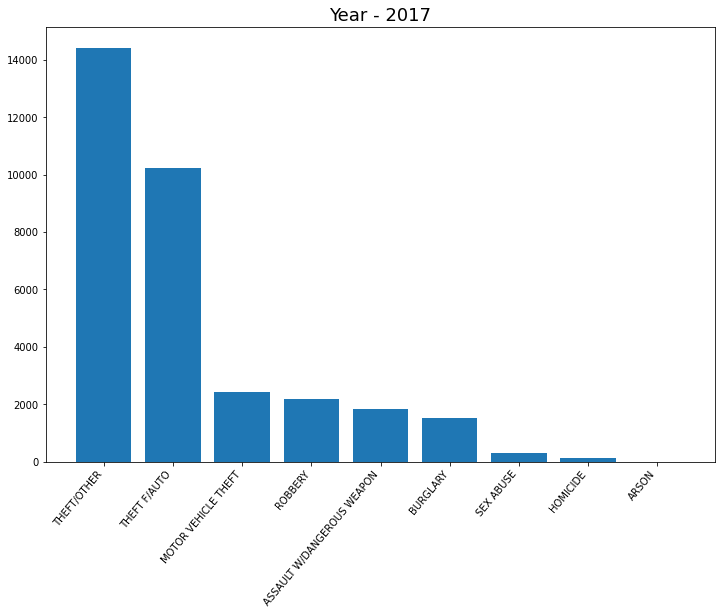

In [24]:
df_date_sorted_2017 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2017])
df_date_sorted_2017 = df_date_sorted_2017.set_index(df_date_sorted_2017['START_DATE'])
df_date_sorted_2017 = df_date_sorted_2017.sort_index()

classes_count_2017 = df_date_sorted_2017['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2017)), list(classes_count_2017.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2017.keys())))
ax.set_xticklabels(labels=list(classes_count_2017.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2017", fontsize=18)

Text(0.5, 1.0, 'Year - 2018')

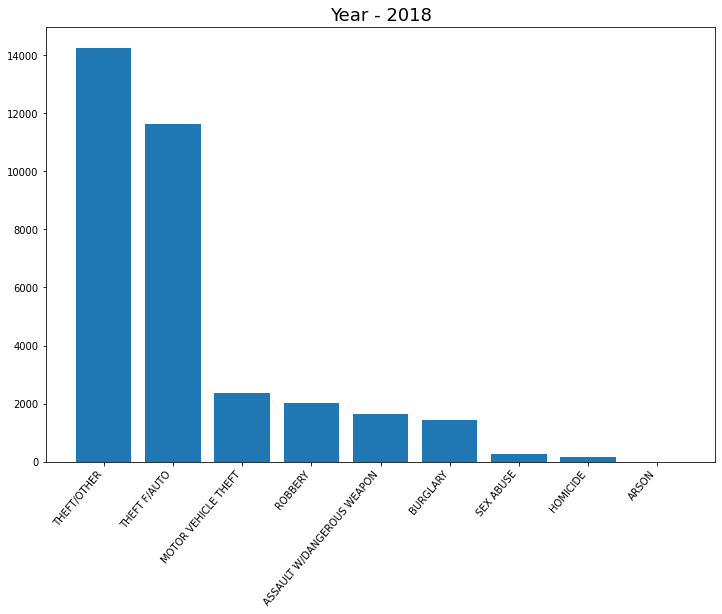

In [25]:
df_date_sorted_2018 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2018])
df_date_sorted_2018 = df_date_sorted_2018.set_index(df_date_sorted_2018['START_DATE'])
df_date_sorted_2018 = df_date_sorted_2018.sort_index()

classes_count_2018 = df_date_sorted_2018['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2018)), list(classes_count_2018.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2018.keys())))
ax.set_xticklabels(labels=list(classes_count_2018.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2018", fontsize=18)

Text(0.5, 1.0, 'Year - 2019')

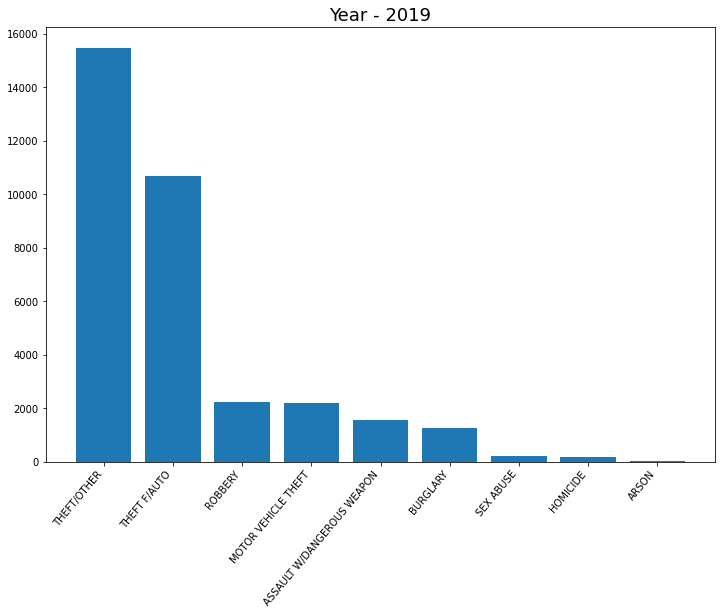

In [26]:
df_date_sorted_2019 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2019])
df_date_sorted_2019 = df_date_sorted_2019.set_index(df_date_sorted_2019['START_DATE']) 
df_date_sorted_2019 = df_date_sorted_2019.sort_index()

classes_count_2019 = df_date_sorted_2019['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2019)), list(classes_count_2019.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2019.keys())))
ax.set_xticklabels(labels=list(classes_count_2019.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2019", fontsize=18)

Text(0.5, 1.0, 'Year - 2020')

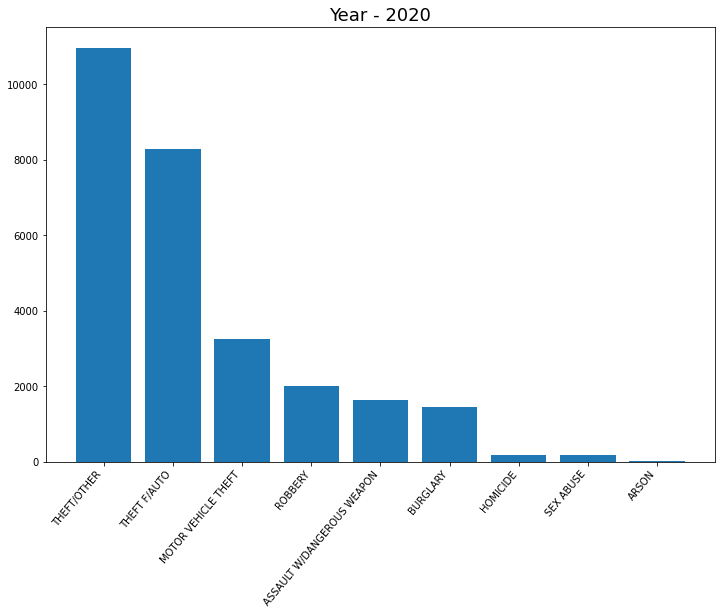

In [27]:
df_date_sorted_2020 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2020])
df_date_sorted_2020 = df_date_sorted_2020.set_index(df_date_sorted_2020['START_DATE']) 
df_date_sorted_2020 = df_date_sorted_2020.sort_index()

classes_count_2020 = df_date_sorted_2020['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2020)), list(classes_count_2020.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2020.keys())))
ax.set_xticklabels(labels=list(classes_count_2020.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2020", fontsize=18)

Text(0.5, 1.0, 'Year - 2021')

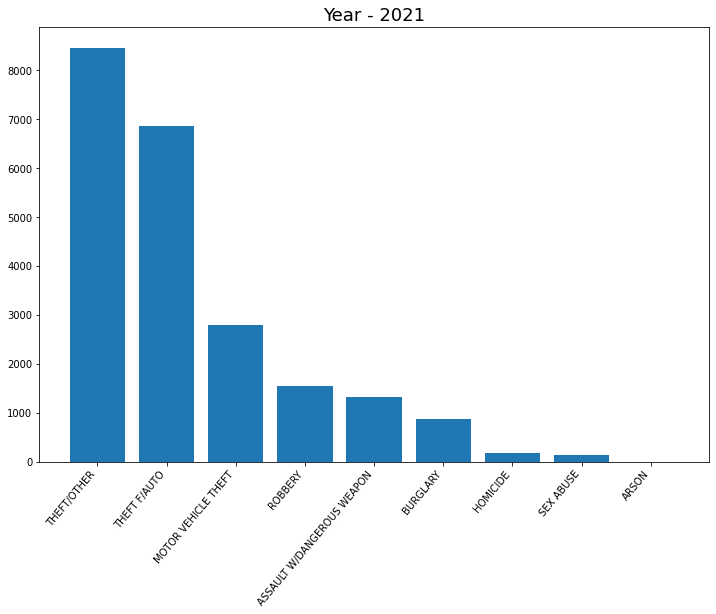

In [28]:
df_date_sorted_2021 = copy.deepcopy(df_date_sorted[df_date_sorted['START_DATE'].dt.year == 2021])
df_date_sorted_2021 = df_date_sorted_2021.set_index(df_date_sorted_2021['START_DATE'])
df_date_sorted_2021 = df_date_sorted_2021.sort_index()

classes_count_2021 = df_date_sorted_2021['OFFENSE'].value_counts().to_dict()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(range(len(classes_count_2021)), list(classes_count_2021.values()), align='center')
ax.set_xticks(np.arange(len(classes_count_2021.keys())))
ax.set_xticklabels(labels=list(classes_count_2021.keys()))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title("Year - 2021", fontsize=18)

GeoPandas dataframe setup for annual hotspot

In [29]:
crs=CRS('EPSG:4326')
geo_precovid = precovid.copy()
geo_covid = covid.copy()

geometry_pre_covid_2017 = [Point(xy) for xy in zip(df_date_sorted_2017['LONGITUDE'], df_date_sorted_2017['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2017 = gpd.GeoDataFrame(df_date_sorted_2017,
 crs = crs,
 geometry = geometry_pre_covid_2017)

geometry_pre_covid_2018 = [Point(xy) for xy in zip(df_date_sorted_2018['LONGITUDE'], df_date_sorted_2018['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2018 = gpd.GeoDataFrame(df_date_sorted_2018,
 crs = crs,
 geometry = geometry_pre_covid_2018)

geometry_pre_covid_2019 = [Point(xy) for xy in zip(df_date_sorted_2019['LONGITUDE'], df_date_sorted_2019['LATITUDE'])]
# create GeoPandas dataframe
geo_df_pre_covid_2019 = gpd.GeoDataFrame(df_date_sorted_2019,
 crs = crs,
 geometry = geometry_pre_covid_2019)

geometry_post_covid_2020 = [Point(xy) for xy in zip(df_date_sorted_2020['LONGITUDE'], df_date_sorted_2020['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2020 = gpd.GeoDataFrame(df_date_sorted_2020,
 crs = crs,
 geometry = geometry_post_covid_2020)

geometry_post_covid_2021 = [Point(xy) for xy in zip(df_date_sorted_2021['LONGITUDE'], df_date_sorted_2021['LATITUDE'])]
# create GeoPandas dataframe
geo_df_post_covid_2021 = gpd.GeoDataFrame(df_date_sorted_2021,
 crs = crs,
 geometry = geometry_post_covid_2021)

#####DC Crime Hotspot - 2017

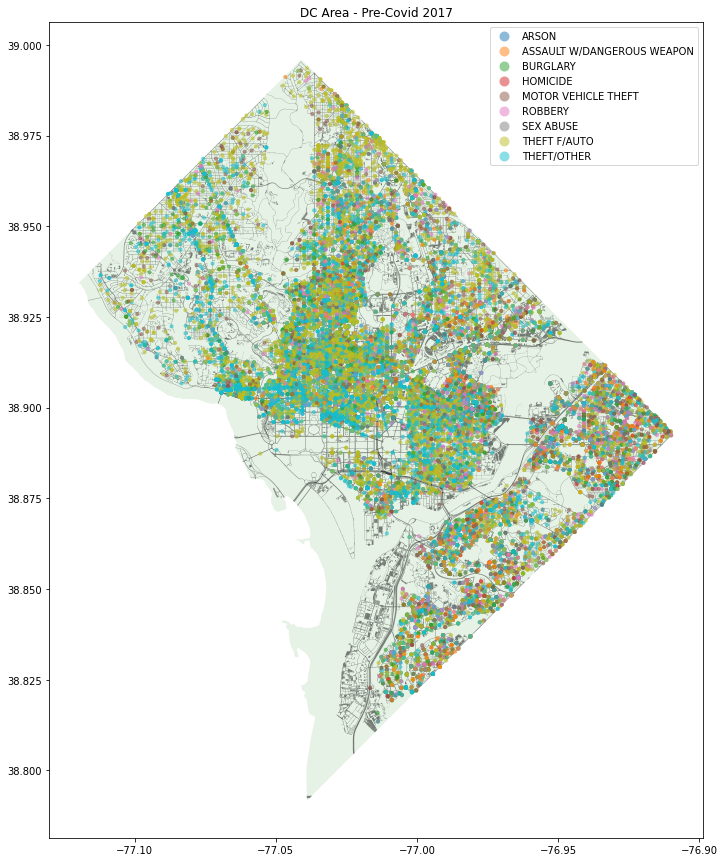

In [30]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2017.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2017')

#####DC Crime Hotspot - 2018



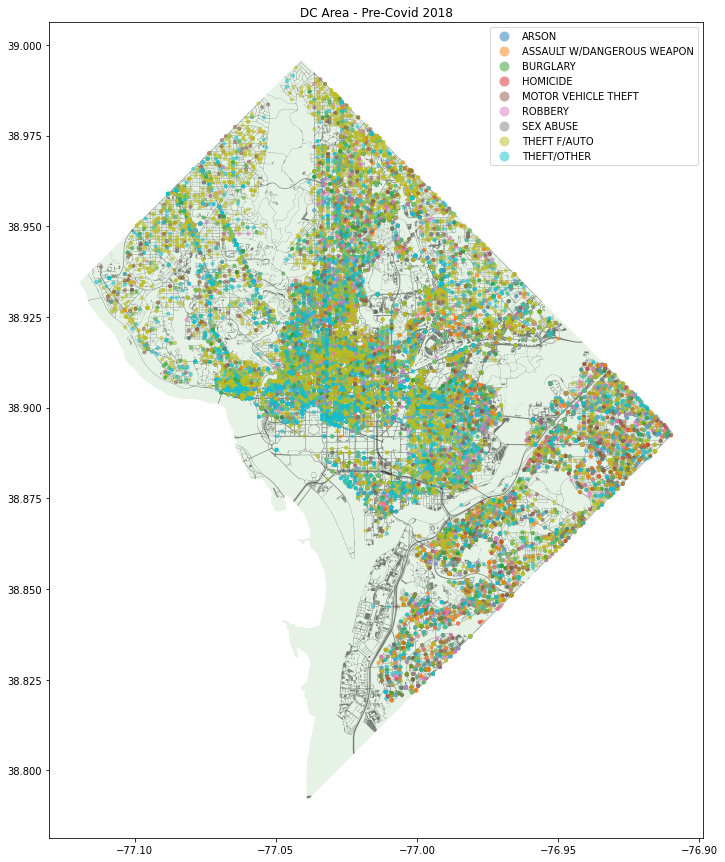

In [31]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2018.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2018')

#####DC Crime Hotspot - 2019


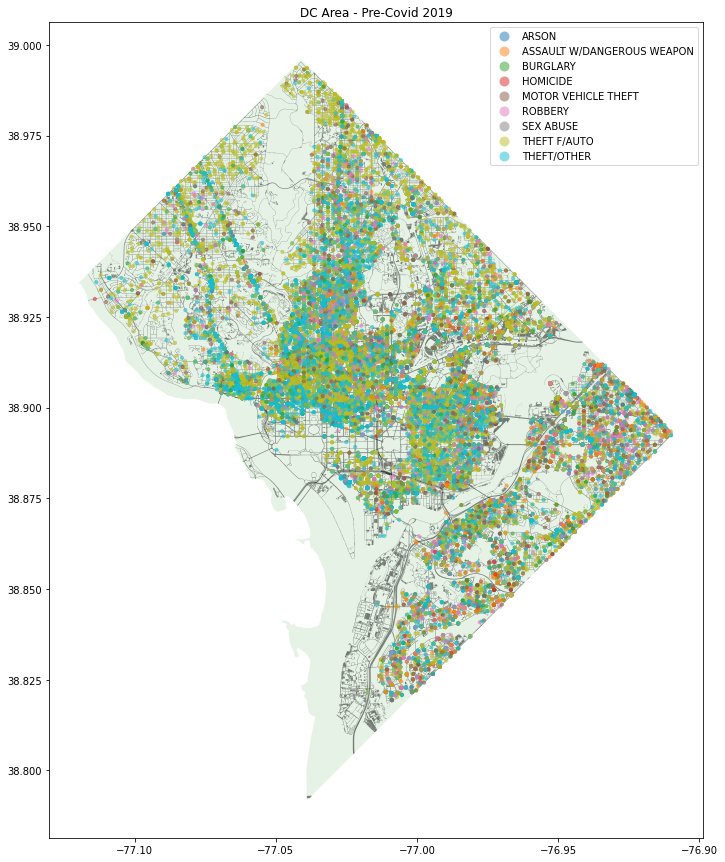

In [32]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid_2019.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Pre-Covid 2019')

##### DC Crime Hotspot - 2020

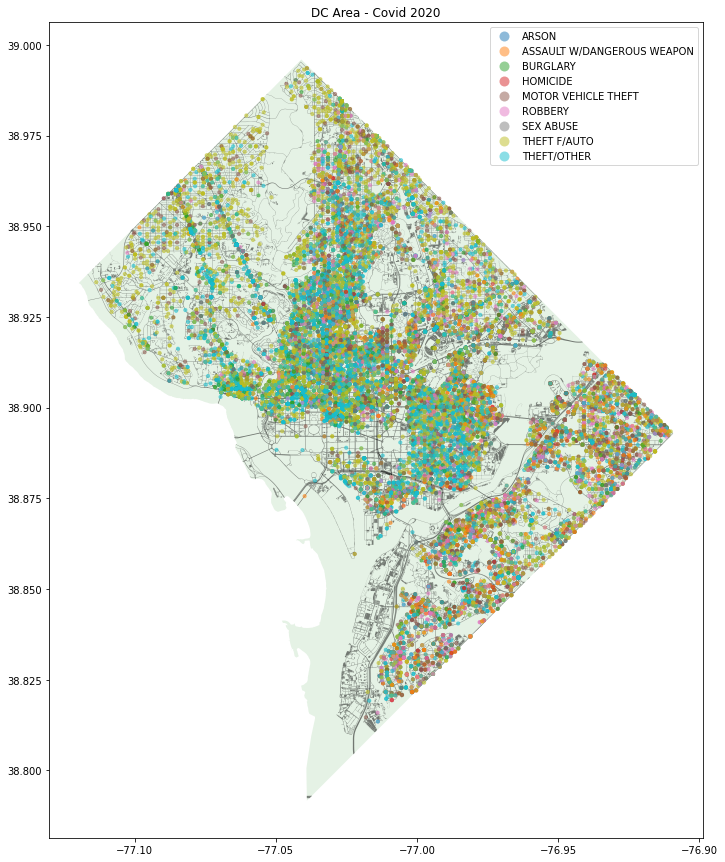

In [33]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2020.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2020')

##### DC Crime Hotspot - 2021

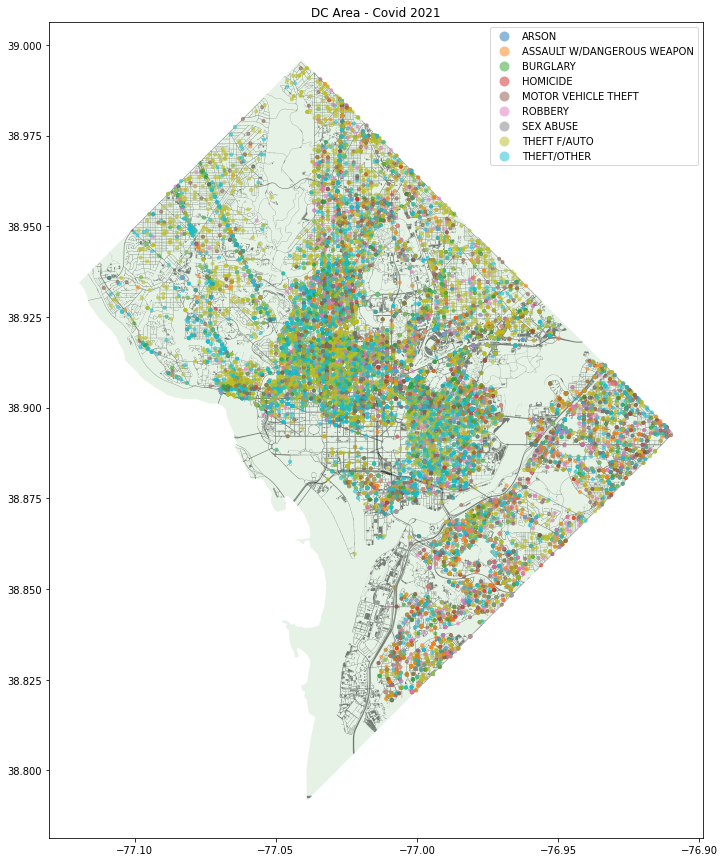

In [34]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
# add .shp mapfile to axes
border_map.plot(ax=ax, alpha=0.1, color='green')
street_map.plot(ax=ax, alpha=0.5, color='black')
# overlay samples
geo_df_post_covid_2021.plot(column='OFFENSE',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
ax.title.set_text('DC Area - Covid 2021')

##### Plot accumulative hotspot for Pre-Covid and Covid timeframes

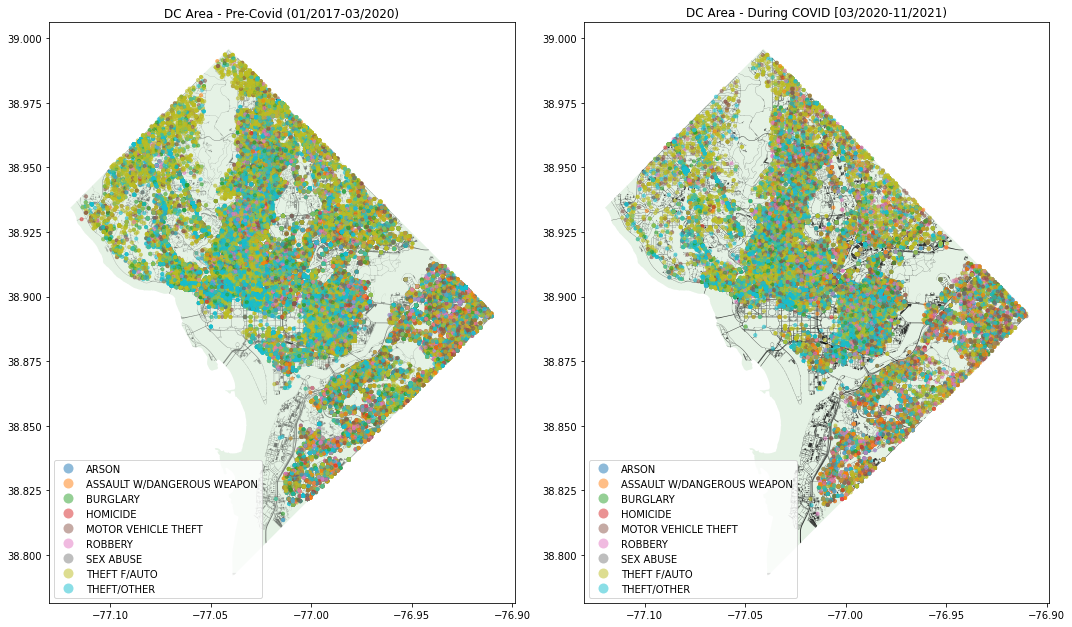

In [35]:
geometry_pre_covid = [Point(xy) for xy in zip(geo_precovid['LONGITUDE'], geo_precovid['LATITUDE'])]
geo_df_pre_covid = gpd.GeoDataFrame(geo_precovid, crs = crs, geometry = geometry_pre_covid)

geometry_post_covid = [Point(xy) for xy in zip(geo_covid['LONGITUDE'], geo_covid['LATITUDE'])]
geo_df_post_covid = gpd.GeoDataFrame(geo_covid, crs = crs, geometry = geometry_post_covid)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# add .shp mapfile to axes
border_map.plot(ax=ax[0], alpha=0.1, color='green')
street_map.plot(ax=ax[0], alpha=0.5, color='black')
# overlay samples
geo_df_pre_covid.plot(column='OFFENSE',ax=ax[0],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[0].title.set_text('DC Area - Pre-Covid (01/2017-03/2020)')

# add .shp mapfile to axes
border_map.plot(ax=ax[1], alpha=0.1, color='green')
street_map.plot(ax=ax[1], alpha=0.8, color='black')
# overlay samples
geo_df_post_covid.plot(column='OFFENSE',ax=ax[1],alpha=0.5, legend=True,markersize=10)
# add title to graph
ax[1].title.set_text('DC Area - During COVID [03/2020-11/2021)')

fig.tight_layout()

#### Correlation Heatmap Pre-COVID

Text(0.5, 1.0, 'Correlation Heatmap Pre-COVID')

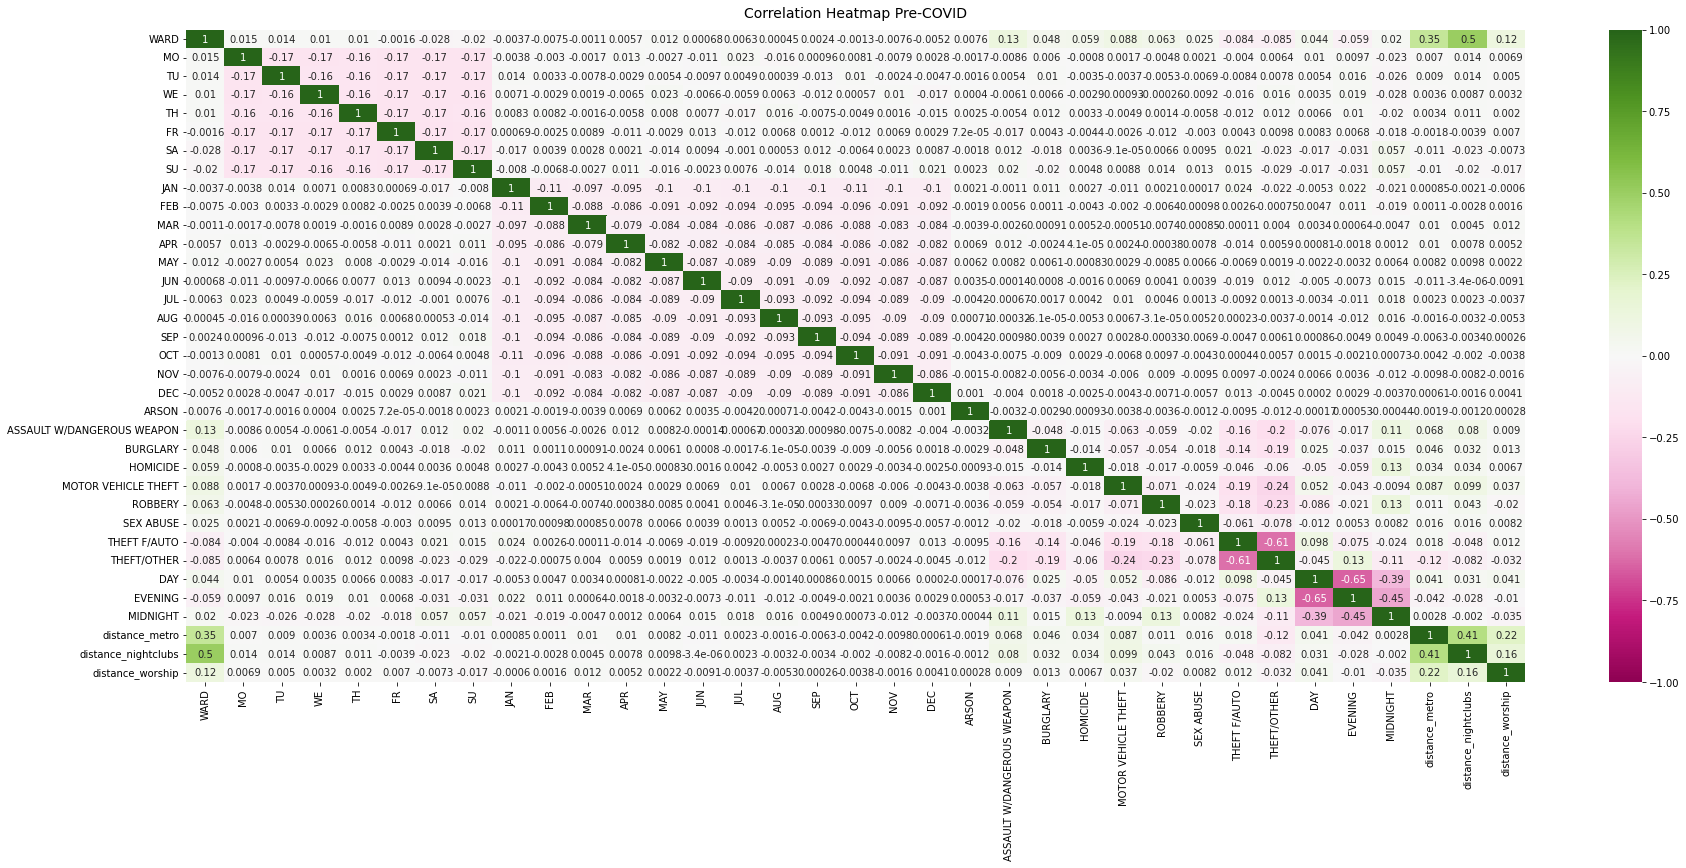

In [37]:
plt.figure(figsize = (30,12))
precovid_hm = precovid.drop(columns=['Unnamed: 0', 'LATITUDE', 'LONGITUDE','total_cases', 'daily_cases', 'daily_death',
       'OUT_POSITIVE_QUARANTINE_PSMPD', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])
heatmap = sns.heatmap(precovid_hm.corr(), vmin= -1, vmax = 1, annot = True, cmap="PiYG")

heatmap.set_title('Correlation Heatmap Pre-COVID', fontdict = {'fontsize':14}, pad = 12)

#### Correlation Heatmap Covid

Text(0.5, 1.0, 'Correlation Heatmap During COVID')

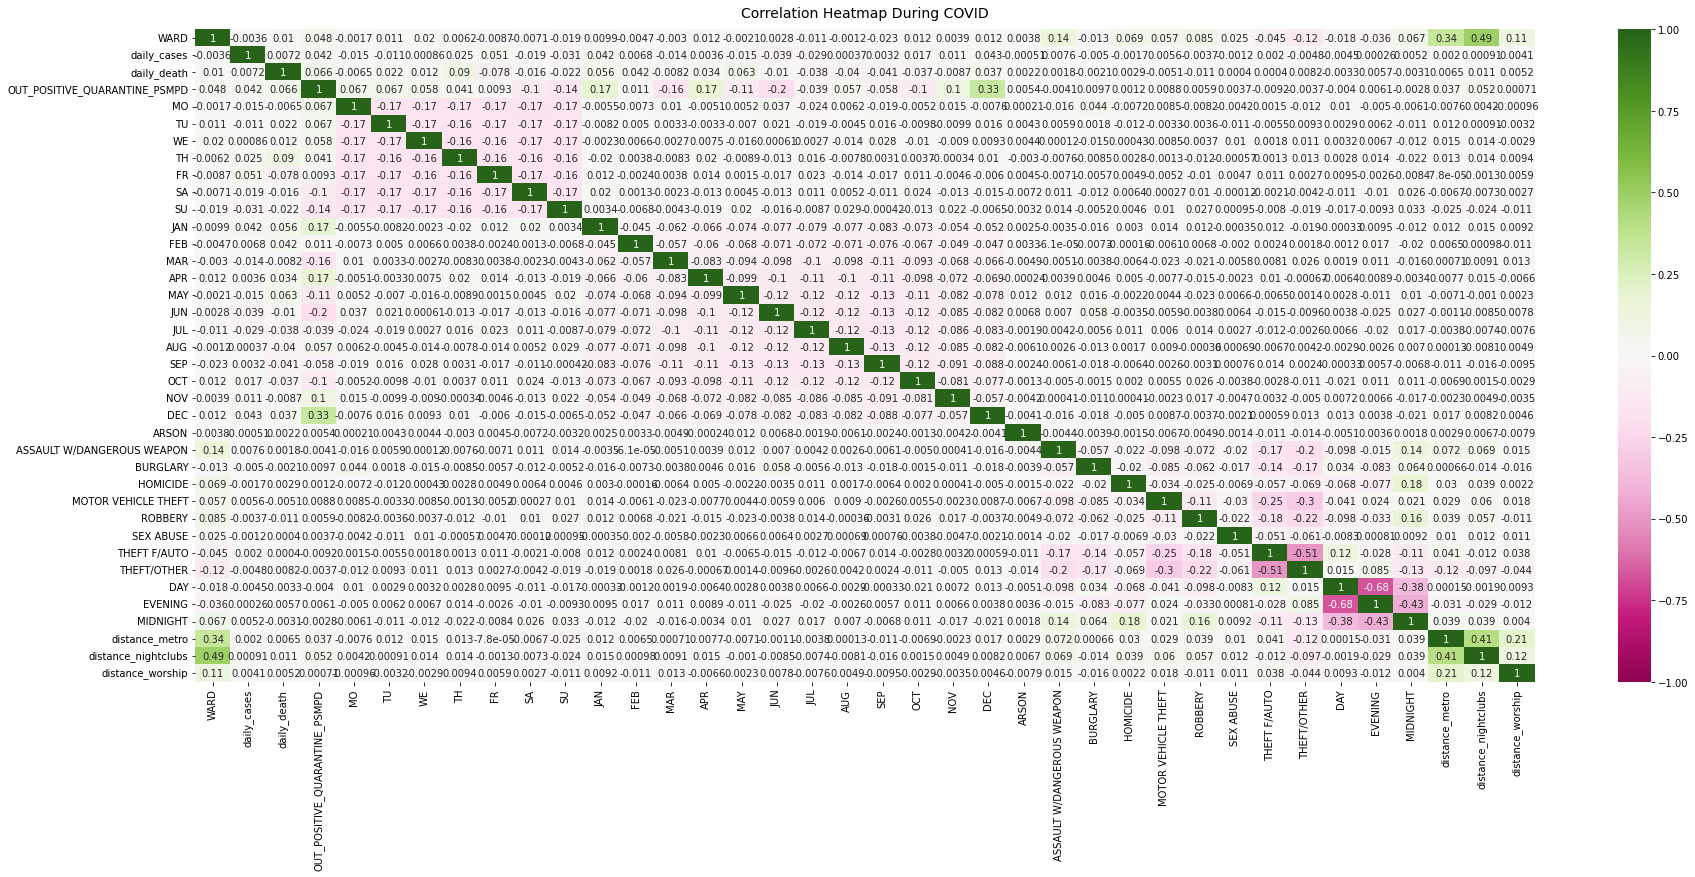

In [38]:
plt.figure(figsize = (30,12))
covid_hm = covid.drop(columns=['Unnamed: 0', 'LATITUDE', 'LONGITUDE','total_cases', 'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5',
       'ward_6', 'ward_7', 'ward_8'])
heatmap = sns.heatmap(covid_hm.corr(), vmin= -1, vmax = 1, annot = True, cmap='PiYG')

heatmap.set_title('Correlation Heatmap During COVID', fontdict = {'fontsize':14}, pad = 12)

### Data Processing for Model Training

In [39]:
pre_covid_data = precovid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])
covid_data = covid.drop(columns=['Unnamed: 0', 'SHIFT','OFFENSE', 'LATITUDE', 'LONGITUDE', 'ward_1', 'ward_2', 
                                              'ward_3', 'ward_4', 'ward_5', 'ward_6', 'ward_7', 'ward_8'])

pre_covid_data['WARD'] = pre_covid_data['WARD'].astype(int)
covid_data['WARD'] = covid_data['WARD'].astype(int)

In [40]:
pre_covid_data.sample(3)

WARD        date  total_cases  daily_cases  daily_death  \
19674     5  2017-04-13          0.0          0.0          0.0   
93643     8  2019-08-12          0.0          0.0          0.0   
32835     1  2018-01-19          0.0          0.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
19674                            0.0   0   0   0   1   0   0   0    0    0   
93643                            0.0   1   0   0   0   0   0   0    0    0   
32835                            0.0   0   0   0   0   1   0   0    1    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
19674    0    1    0    0    0    0    0    0    0    0      0   
93643    0    0    0    0    0    1    0    0    0    0      0   
32835    0    0    0    0    0    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
19674                           0         0         0                    0   
93643                           0         0         0                    0   
32835                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
19674        0          0             1            0    1        0         0   
93643        0          0             1            0    1        0         0   
32835        0          0             0            1    1        0         0   

       distance_metro  distance_nightclubs  distance_worship  
19674        0.202160             0.835687          0.153180  
93643        0.450772             0.780531          0.016974  
32835        0.028727             0.204825          0.029629

In [41]:
covid_data.sample(3)

WARD        date  total_cases  daily_cases  daily_death  \
37711     8  2021-08-08          0.0          0.0          0.0   
23387     1  2021-04-12      46016.0        113.0          1.0   
20186     5  2020-07-20      11427.0         88.0          1.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
37711                           36.0   0   0   0   0   0   0   1    0    0   
23387                           24.0   1   0   0   0   0   0   0    0    0   
20186                          169.0   1   0   0   0   0   0   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
37711    0    0    0    0    0    1    0    0    0    0      0   
23387    0    1    0    0    0    0    0    0    0    0      0   
20186    0    0    0    0    1    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
37711                           0         0         0                    1   
23387                           0         0         0                    1   
20186                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
37711        0          0             0            0    0        1         0   
23387        0          0             0            0    0        0         1   
20186        0          0             1            0    0        1         0   

       distance_metro  distance_nightclubs  distance_worship  
37711        0.255127             0.724046          0.030695  
23387        0.076546             0.224119          0.034211  
20186        1.135343             0.568620          0.026616

In [42]:
# Baseline:
x_PRE_COVID_baseline_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_baseline_not_scaled["total_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_death"]
del x_PRE_COVID_baseline_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_baseline_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Experiment:
x_PRE_COVID_experiment_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_experiment_not_scaled["total_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_death"]
del x_PRE_COVID_experiment_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_experiment_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Labels:
y_PRE_COVID_base = pre_covid_data['WARD']
y_COVID_base = covid_data['WARD']

y_PRE_COVID_experiment = covid_data['WARD']
y_COVID_experiment = pre_covid_data['WARD']

In [43]:
x_PRE_COVID_baseline_not_scaled.sample(3)

date  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  MAR  APR  MAY  JUN  \
16879  2017-11-03   0   0   0   0   1   0   0    0    0    0    0    0    0   
62239  2018-08-09   0   0   0   1   0   0   0    0    0    0    0    0    0   
20495  2017-05-21   0   0   0   0   0   0   1    0    0    0    0    1    0   

       JUL  AUG  SEP  OCT  NOV  DEC  ARSON  ASSAULT W/DANGEROUS WEAPON  \
16879    0    0    0    0    1    0      0                           0   
62239    0    1    0    0    0    0      0                           0   
20495    0    0    0    0    0    0      0                           0   

       BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  ROBBERY  SEX ABUSE  \
16879         0         0                    0        0          0   
62239         0         0                    0        0          0   
20495         0         0                    0        1          0   

       THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  distance_metro  \
16879             0            1    0        0         1        0.339129   
62239             0            1    1        0         0        0.153688   
20495             0            0    0        0         1        0.271614   

       distance_nightclubs  distance_worship  
16879             1.566078          0.058545  
62239             0.125414          0.017674  
20495             0.655719          0.080021

In [44]:
x_COVID_baseline_not_scaled.sample(3)

date  total_cases  daily_cases  daily_death  \
33525  2021-10-04      61863.0         39.0          1.0   
14374  2020-11-10      18379.0        206.0          0.0   
42382  2021-04-25      47378.0         55.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
33525                           42.0   1   0   0   0   0   0   0    0    0   
14374                           93.0   0   1   0   0   0   0   0    0    0   
42382                            0.0   0   0   0   0   0   0   1    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
33525    0    0    0    0    0    0    0    1    0    0      0   
14374    0    0    0    0    0    0    0    0    1    0      0   
42382    0    1    0    0    0    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
33525                           0         0         0                    0   
14374                           0         0         0                    0   
42382                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
33525        0          0             0            1    0        1         0   
14374        1          0             0            0    0        0         1   
42382        0          0             1            0    0        1         0   

       distance_metro  distance_nightclubs  distance_worship  
33525        0.092795             0.134928          0.036365  
14374        0.038027             2.552682          0.007189  
42382        0.914026             0.473192          0.136090

In [45]:
x_PRE_COVID_experiment_not_scaled.sample(3)

date  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  MAR  APR  MAY  JUN  \
28852  2021-08-09   1   0   0   0   0   0   0    0    0    0    0    0    0   
6811   2020-08-22   0   0   0   0   0   1   0    0    0    0    0    0    0   
29120  2021-06-25   0   0   0   0   1   0   0    0    0    0    0    0    1   

       JUL  AUG  SEP  OCT  NOV  DEC  ARSON  ASSAULT W/DANGEROUS WEAPON  \
28852    0    1    0    0    0    0      0                           0   
6811     0    1    0    0    0    0      0                           0   
29120    0    0    0    0    0    0      0                           0   

       BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  ROBBERY  SEX ABUSE  \
28852         0         0                    0        0          0   
6811          0         0                    0        0          0   
29120         0         0                    0        0          0   

       THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  distance_metro  \
28852             1            0    1        0         0        0.838434   
6811              1            0    0        1         0        0.369284   
29120             1            0    1        0         0        0.686475   

       distance_nightclubs  distance_worship  
28852             0.841519          0.050544  
6811              0.255064          0.080801  
29120             3.258168          0.053924

In [46]:
x_COVID_experiment_not_scaled.sample(3)

date  total_cases  daily_cases  daily_death  \
95676  2019-10-13          0.0          0.0          0.0   
67749  2019-02-04          0.0          0.0          0.0   
90407  2019-07-01          0.0          0.0          0.0   

       OUT_POSITIVE_QUARANTINE_PSMPD  MO  TU  WE  TH  FR  SA  SU  JAN  FEB  \
95676                            0.0   0   0   0   0   0   0   1    0    0   
67749                            0.0   1   0   0   0   0   0   0    0    1   
90407                            0.0   1   0   0   0   0   0   0    0    0   

       MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC  ARSON  \
95676    0    0    0    0    0    0    0    1    0    0      0   
67749    0    0    0    0    0    0    0    0    0    0      0   
90407    0    0    0    0    1    0    0    0    0    0      0   

       ASSAULT W/DANGEROUS WEAPON  BURGLARY  HOMICIDE  MOTOR VEHICLE THEFT  \
95676                           0         0         0                    0   
67749                           0         0         0                    0   
90407                           0         0         0                    0   

       ROBBERY  SEX ABUSE  THEFT F/AUTO  THEFT/OTHER  DAY  EVENING  MIDNIGHT  \
95676        0          0             0            1    1        0         0   
67749        0          0             1            0    0        1         0   
90407        0          0             0            1    0        0         1   

       distance_metro  distance_nightclubs  distance_worship  
95676        0.076368             0.030668          0.112729  
67749        0.342028             0.731980          0.058277  
90407        0.036313             0.368427          0.148793

In [47]:
del x_PRE_COVID_baseline_not_scaled['date']
del x_COVID_baseline_not_scaled['date']
del x_PRE_COVID_experiment_not_scaled['date']
del x_COVID_experiment_not_scaled['date']

### ML Algorithms


1.   Logistic Regression
2.   Decision Tree
2.   Random Forest
3.   Gradient Boost
4.   KNN
5.   SVC

#### Function that splits the dataset with 5 different random seeds and trains each model. Once the models are trained, accuracy, precision and recall values are returned. 

In [48]:
def cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, x_COVID_baseline_not_scaled, y_COVID_base, 
                     x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, x_COVID_experiment_not_scaled, y_COVID_experiment,
                     precovid_model, covid_model):   
  # get original data
  random_state = [1, 10, 25, 40, 50]

  ###################
  cross_val_score_lst_PRE_COVID_MODEL_base = []
  pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  cross_val_score_lst_COVID_MODEL_base = []
  pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

  ###################
  cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
  pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

  cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
  pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

  ###################
  # go through validation splits
  for val in range(0, 5):
      
      state_idx = val
      ############################
      #### GET Nth VALIDATION ####
      ############################
      # get Nth validation
      # Baseline:
      curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                            y_PRE_COVID_base,
                                                                                                                                                            test_size=0.3,
                                                                                                                                                            shuffle=True,
                                                                                                                                                            random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                            y_COVID_base, 
                                                                                                                                            test_size=0.3, 
                                                                                                                                            shuffle=True,
                                                                                                                                            random_state=random_state[state_idx])
      # Experiment
      curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                    y_PRE_COVID_experiment,
                                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                                    shuffle=True,
                                                                                                                                                                                    random_state=random_state[state_idx])
      
      curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                    y_COVID_experiment, 
                                                                                                                                                                    test_size=0.3, 
                                                                                                                                                                    shuffle=True,
                                                                                                                                                                    random_state=random_state[state_idx])
      
      # Setup scaler and train on according baseline trains
      MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

      MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
      MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
      
      ####################
      #### SCALE DATA ####
      ####################
      # Scale the data (Base one, and experiment one)
      # For PRE_COVID:
      curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
      curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
      curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

      # For COVID:
      curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
      curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
      curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
      
      #############################
      #### PRE-COVID PRE-MODEL ####
      #############################
      curr_model_PRE_COVID = precovid_model
      curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
      # Get Pre-COVID Baseline:
      curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
      curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                      average='macro') 
      curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                                curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                average='macro')
      
      cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
      pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
      
      
      # Get Pre-COVID Experiment:
      curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
      curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                            curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                            average='macro') 
      curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                      curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                      average='macro')
      
      cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
      pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
      
      
      #########################
      #### COVID PRE-MODEL ####
      #########################
      curr_model_COVID = covid_model
      curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
      # Get COVID Baseline:
      curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base))
      curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_base),
                                                  average='macro') 
      curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                            curr_model_COVID.predict(curr_x_test_COVID_base),
                                            average='macro')
      
      cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
      pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
      
      
      # Get COVID Experiment:
      curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
      curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                        curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                        average='macro') 
      curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                  curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                  average='macro')
      
      cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
      pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])
  return print("Dataset shapes:","  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape,
               "  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape,
               "  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape,
               "  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape,
               "\n",
               "PRE-COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base,
               '\n',
               "COVID Model Baseline:",
               "Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_base,
               '\n',
               "PRE-COVID Model Experiment (on COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment,
               '\n',
               "COVID Model Experiment (on Pre-COVID Data):",
               "Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment,
               "Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment,
               sep='\n')

#### Logisitic Regression

In [49]:
# set the hyperparameters for each model
precovid_lr = LogisticRegression(multi_class='multinomial', C=100, penalty='l2', solver='lbfgs', max_iter=200)
covid_lr = LogisticRegression(multi_class='multinomial', C=1000, penalty='l2', solver='lbfgs', max_iter=100)

In [50]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_lr, covid_lr)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.43723648907627444, 0.4373323112303565, 0.4403666794429539, 0.4426344704228951, 0.44311358119330524]
Precision and Recall from each fold:
[[0.43043258796648376, 0.39151614040494503], [0.41821754220793994, 0.38895858518385384], [0.4081670698134008, 0.3915526362671202], [0.41876129641895615, 0.3911460155837955], [0.4291105975166765, 0.39373292051062436]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.44193050193050193, 0.443011583011583, 0.4395366795366795, 0.4376061776061776, 0.4456370656370656]
Precision and Recall from each fold:
[[0.40967412668798897, 0.38984402231877213], [0.4169645973475906, 0.3903527827661393], [0.41106015234187454, 0.3877197527670272], [0.4149010744074796, 0.38653470107098303], [0.42529590432320336, 0.391869588921

#### Random Forest

In [51]:
precovid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)
covid_rf = RandomForestClassifier(n_estimators = 800, max_depth = 2)

In [52]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_rf, covid_rf)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.3404880541714578, 0.34470422895106684, 0.3490162258847579, 0.35262552702184746, 0.34365018525616453]
Precision and Recall from each fold:
[[0.19058261897486928, 0.2768315975078143], [0.19277212455019058, 0.2782777417517762], [0.19413355584380468, 0.2802205069674195], [0.19495089011768166, 0.2812507801860959], [0.19731789249562437, 0.27713695402948857]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.34378378378378377, 0.34378378378378377, 0.3464092664092664, 0.3450965250965251, 0.3474131274131274]
Precision and Recall from each fold:
[[0.27710695928368506, 0.27885390939143395], [0.26387558627411467, 0.2788418338391063], [0.2744530900888764, 0.2810114229370252], [0.18023994122256526, 0.27792051736278367], [0.18114709568426934, 0.28042058

#### Gradient Boost

In [14]:
precovid_gb = GradientBoostingClassifier()
covid_gb = GradientBoostingClassifier()

In [15]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_gb, covid_gb)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.7343171074485755, 0.7346684553468762, 0.7365529577104893, 0.7310272134917593, 0.7331991823176185]
Precision and Recall from each fold:
[[0.760527781857646, 0.7043868793094801], [0.7622891644620615, 0.7068637225319618], [0.761879596654728, 0.7081040270482771], [0.7555887396577274, 0.6981108280303607], [0.7568173389302, 0.7031773297217377]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.7179150579150579, 0.7146718146718146, 0.7105791505791506, 0.7122779922779923, 0.716061776061776]
Precision and Recall from each fold:
[[0.7429240491893248, 0.6859335158819087], [0.7423348853188261, 0.6849088248264883], [0.7318307180267603, 0.6798809099756704], [0.7347087417997531, 0.6863074716065034], [0.7402285481319937, 0.6839618225457599]]


PRE-COVID 

#### KNN

In [ ]:
precovid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)
covid_knn = KNeighborsClassifier(n_neighbors=15, p=2, metric="minkowski", n_jobs=-1)

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_knn, covid_knn)

Dataset shapes:
  X_train_PRE_COVID_Baseline:
(73051, 34)
  X_train_PRE_COVID_Experiment:
(30214, 34)
  X_train_COVID_Baseline:
(30214, 38)
  X_train_COVID_Experiment:
(73051, 38)


PRE-COVID Model Baseline:
Accuracy scores from each fold:
[0.39437204548358246, 0.3950108598441293, 0.3977577615944806, 0.3951066819982113, 0.39945061964992973]
Precision and Recall from each fold:
[[0.3933702931705667, 0.3512493857041524], [0.3914566655070022, 0.35028134516235493], [0.3883987370909343, 0.35226007458013714], [0.3880322875334751, 0.34787182600723265], [0.3951972375151216, 0.35312885812948386]]


COVID Model Baseline:
Accuracy scores from each fold:
[0.28463320463320463, 0.2925096525096525, 0.29011583011583014, 0.2911196911196911, 0.2965250965250965]
Precision and Recall from each fold:
[[0.2931842321944159, 0.25217922312825913], [0.30680722811727684, 0.25906607964699213], [0.30445080973183564, 0.25803871381688603], [0.308358860944992, 0.260143816895936], [0.2953495323081444, 0.26092774733645

#### SVC
This model took over 8 hours to run. The results are copied over from a different notebook ([Github Link](https://github.com/joannechoi/DC-Crime-Analysis/blob/main/Training_Frameworks/Training_Pipeline_with_CV-SVC.ipynb))

In [ ]:
precovid_svc = SVC(C=41, kernel='rbf')
covid_svc = SVC(C=41, kernel='rbf')

In [ ]:
cross_validation(x_PRE_COVID_baseline_not_scaled, y_PRE_COVID_base, 
                 x_COVID_baseline_not_scaled, y_COVID_base, 
                 x_PRE_COVID_experiment_not_scaled, y_PRE_COVID_experiment, 
                 x_COVID_experiment_not_scaled, y_COVID_experiment, precovid_svc, covid_svc)

In [ ]:
print("PRE-COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base)

PRE-COVID Model Baseline:
Accuracy scores from each fold: [0.46227801200970997, 0.4688897406413696, 0.4702631915165453, 0.46799540053660404, 0.46789957838252205]
Precision and Recall from each fold: [[0.4600811913799536, 0.42176124121828024], [0.46684113263673577, 0.4265247383457995], [0.4664204837734109, 0.4278619067950967], [0.4611016227967444, 0.42343619261026777], [0.4616127562270751, 0.425496443931815]]


In [ ]:
print("COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_base)

COVID Model Baseline:
Accuracy scores from each fold: [0.4365250965250965, 0.4327413127413127, 0.43644787644787647, 0.43853281853281856, 0.44193050193050193]
Precision and Recall from each fold: [[0.4193015670508638, 0.39963502985168853], [0.4127082626105499, 0.39606447552368057], [0.42123364227372706, 0.403593739918649], [0.42454616269292833, 0.40431189268939327], [0.4183937054223431, 0.40364497580448083]]


In [ ]:
print("PRE-COVID Model Experiment (on COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment)

PRE-COVID Model Experiment (on COVID Data):
Accuracy scores from each fold: [0.44007722007722005, 0.4416988416988417, 0.4338996138996139, 0.4434749034749035, 0.4491891891891892]
Precision and Recall from each fold: [[0.43654384849467837, 0.40117210916580337], [0.4282334887236212, 0.39926204364316226], [0.4290577697764332, 0.395231990273601], [0.43189612372257347, 0.4032037667611386], [0.4338726844421079, 0.4082946589481879]]


In [ ]:
print("COVID Model Experiment (on Pre-COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment)

COVID Model Experiment (on Pre-COVID Data):
Accuracy scores from each fold: [0.4104382266513351, 0.4137281206081513, 0.4187747540564712, 0.4155168008176824, 0.4204037306758656]
Precision and Recall from each fold: [[0.3974953429679458, 0.3791391204998384], [0.3983105772508634, 0.37941919009337055], [0.4038434603327168, 0.3863698924603277], [0.39911304519377677, 0.3826678561457243], [0.40304380260667794, 0.38447997055442684]]


## Results
We used the Wilcoxon signed-rank test between the baseline and experiment data on the pre-COVID and COVID models to determine if there was a significant difference between the models.

In [53]:
# create Wilcoxon signed-rank test function
def wil(data1, data2):
    stat, p = wilcoxon(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
        
# mean function
def average(lst):
    return mean(lst)

In [54]:
# grab the accuracies for each model

#KNN
KNN_PRE_COVID_Model_Baseline = [0.39437204548358246, 0.3950108598441293, 0.3977577615944806, 0.3951066819982113, 0.39945061964992973]
KNN_COVID_Model_Baseline =[0.28463320463320463, 0.2925096525096525, 0.29011583011583014, 0.2911196911196911, 0.2965250965250965]
KNN_PRE_COVID_Model_Experiment =[0.35922779922779924, 0.3606949806949807, 0.3553667953667954, 0.36416988416988416, 0.3647104247104247]
KNN_COVID_Model_Experiment = [0.26660917337421747, 0.2668008176823815, 0.26469273029257695, 0.25990162258847577, 0.2683659128657212]

#LOGISTIC
LO_PRE_COVID_Model_Baseline = [0.43723648907627444, 0.4373323112303565, 0.4403666794429539, 0.4426344704228951, 0.44311358119330524]
LO_COVID_Model_Baseline =[0.44355212355212353, 0.4413899613899614, 0.44077220077220075, 0.43876447876447877, 0.4463320463320463]
LO_PRE_COVID_Model_Experiment =[0.4268725868725869, 0.42718146718146716, 0.42648648648648646, 0.4335907335907336, 0.43382239382239385]
LO_COVID_Model_Experiment = [0.430177590392232, 0.42324645458029897, 0.4341701801456497, 0.4249073719177207, 0.4322856777820365]

#Gradient Boost
GB_PRE_COVID_Model_Baseline = [0.5817682381499936, 0.5812891273795835, 0.5806822537370641, 0.5779353519867126, 0.5810655423533921]
GB_COVID_Model_Baseline =[0.5395366795366795, 0.5732046332046332, 0.5663320463320464, 0.5342084942084943, 0.5247876447876448]
GB_PRE_COVID_Model_Experiment =[0.5511969111969112, 0.5515057915057915, 0.5487258687258687, 0.542007722007722, 0.5466409266409267]
GB_COVID_Model_Experiment = [0.5391593203015204, 0.5735594736169669, 0.5663089306247604, 0.5399578382522039, 0.5280758911460329]

#Random Forest
RF_PRE_COVID_Model_Baseline = [0.3481218857799923, 0.34380988884630126, 0.35032579532387886, 0.35003832886163283, 0.35083684681231636]
RF_COVID_Model_Baseline =[0.3429343629343629, 0.34355212355212356, 0.34494208494208495, 0.34525096525096527, 0.3471042471042471]
RF_PRE_COVID_Model_Experiment =[0.3241698841698842, 0.3246332046332046, 0.32293436293436295, 0.31984555984555985, 0.3211583011583012]
RF_COVID_Model_Experiment = [0.32518845023636134, 0.32707295259997443, 0.3315765938418296, 0.32822281844895873, 0.3288935735275329]

#SVC
SVC_PRE_COVID_Model_Baseline = [0.46227801200970997, 0.4688897406413696, 0.4702631915165453, 0.46799540053660404, 0.46789957838252205]
SVC_COVID_Model_Baseline =[0.4365250965250965, 0.4327413127413127, 0.43644787644787647, 0.43853281853281856, 0.44193050193050193]
SVC_PRE_COVID_Model_Experiment =[0.44007722007722005, 0.4416988416988417, 0.4338996138996139, 0.4434749034749035, 0.4491891891891892]
SVC_COVID_Model_Experiment = [0.4104382266513351, 0.4137281206081513, 0.4187747540564712, 0.4155168008176824, 0.4204037306758656]

In [55]:
# calculate the average for each model

#SVC
print("Average of the SVC Pre-COVID Baseline is",average(SVC_PRE_COVID_Model_Baseline))
print("Average of the SVC COVID  Baseline is",average(SVC_COVID_Model_Experiment))
print("Average of the SVC pre-COVID Experimental is",average(SVC_PRE_COVID_Model_Experiment))
print("Average of the SVC COVID Experimental is",average(SVC_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#LOGISTIC
print("Average of the Logistic Regression Pre-COVID Baseline is",average(LO_PRE_COVID_Model_Baseline))
print("Average of the Logistic Regression COVID  Baseline is",average(LO_COVID_Model_Experiment))
print("Average of the Logistic Regression pre-COVID Experimental is",average(LO_PRE_COVID_Model_Experiment))
print("Average of the Logistic Regression COVID Experimental is",average(LO_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#KNN 
print("Average of the KNN Pre-COVID Baseline is",average(KNN_PRE_COVID_Model_Baseline))
print("Average of the KNN COVID Baseline is",average(KNN_COVID_Model_Baseline))
print("Average of the KNN pre-COVID Experimental is",average(KNN_PRE_COVID_Model_Experiment))
print("Average of the KNN COVID Experimental is",average(KNN_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#Random Forest
print("Average of the Random Forest Pre-COVID Baseline is",average(RF_PRE_COVID_Model_Baseline))
print("Average of the Random Forest COVID  Baseline is",average(RF_COVID_Model_Experiment))
print("Average of the Random Forest pre-COVID Experimental is",average(RF_PRE_COVID_Model_Experiment))
print("Average of the Random Forest COVID Experimental is",average(RF_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

#Gradient Boost
print("Average of the Gradient Boost Pre-COVID Baseline is",average(GB_PRE_COVID_Model_Baseline))
print("Average of the Gradient Boost COVID  Baseline is",average(GB_COVID_Model_Experiment))
print("Average of the Gradient Boost pre-COVID Experimental is",average(GB_PRE_COVID_Model_Experiment))
print("Average of the Gradient Boost COVID Experimental is",average(GB_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")

Average of the SVC Pre-COVID Baseline is 0.4674651846173502
Average of the SVC COVID  Baseline is 0.4157723265619011
Average of the SVC pre-COVID Experimental is 0.4416679536679537
Average of the SVC COVID Experimental is 0.4157723265619011
--------------------------------------------------------------------------------
Average of the Logistic Regression Pre-COVID Baseline is 0.44013670627315704
Average of the Logistic Regression COVID  Baseline is 0.42895745496358756
Average of the Logistic Regression pre-COVID Experimental is 0.4295907335907336
Average of the Logistic Regression COVID Experimental is 0.42895745496358756
--------------------------------------------------------------------------------
Average of the KNN Pre-COVID Baseline is 0.3963395937140667
Average of the KNN COVID Baseline is 0.29098069498069495
Average of the KNN pre-COVID Experimental is 0.36083397683397683
Average of the KNN COVID Experimental is 0.26527405136067456
----------------------------------------------

In [56]:
print("------------------pre-covid Baseline V covid Baseline---------------------------")
print("SVC pre-covid baseline and covid baseline",wil(SVC_PRE_COVID_Model_Baseline,SVC_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Logistic pre-covid baseline and covid baseline",wil(LO_PRE_COVID_Model_Baseline,LO_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("KNN pre-covid baseline and covid baseline",wil(KNN_PRE_COVID_Model_Baseline,KNN_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Random Forest pre-covid baseline and covid baseline",wil(RF_PRE_COVID_Model_Baseline,RF_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")
print("Gradient Boost pre-covid baseline and covid baseline",wil(GB_PRE_COVID_Model_Baseline,GB_COVID_Model_Baseline))
print("--------------------------------------------------------------------------------")

------------------pre-covid Baseline V covid Baseline---------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
SVC pre-covid baseline and covid baseline None
--------------------------------------------------------------------------------
Statistics=3.000, p=0.225
Same distributions (fail to reject H0)
Logistic pre-covid baseline and covid baseline None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
KNN pre-covid baseline and covid baseline None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Random Forest pre-covid baseline and covid baseline None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Gradient Boost pre-covid baseline and covid baseline None
---------------------

In [57]:
print("------------------pre-covid Baseline V Pre-Covid Experimental-------------------")
print("SVC pre-covid baseline and pre-covid experimental",wil(SVC_PRE_COVID_Model_Baseline,SVC_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Logistic pre-covid baseline and pre-covid experimental",wil(LO_PRE_COVID_Model_Baseline,LO_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("KNN pre-covid baseline and pre-covid experimental",wil(KNN_PRE_COVID_Model_Baseline,KNN_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Random Forest pre-covid baseline and pre-covid experimental",wil(RF_PRE_COVID_Model_Baseline,RF_PRE_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Gradient Boost pre-covid baseline and pre-covid experimental",wil(GB_PRE_COVID_Model_Baseline,GB_PRE_COVID_Model_Experiment))

------------------pre-covid Baseline V Pre-Covid Experimental-------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
SVC pre-covid baseline and pre-covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Logistic pre-covid baseline and pre-covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
KNN pre-covid baseline and pre-covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Random Forest pre-covid baseline and pre-covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Gradient Boost pre-covid baseline and pre-covid ex

In [58]:
print("------------------covid Baseline V Pre-Covid Experimental-----------------------")
print("SVC covid baseline and covid experimental",wil(SVC_COVID_Model_Baseline,SVC_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Logistic covid baseline and covid experimental",wil(LO_COVID_Model_Baseline,LO_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("KNN covid baseline and covid experimental",wil(KNN_COVID_Model_Baseline,KNN_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Random Forest covid baseline and covid experimental",wil(RF_COVID_Model_Baseline,RF_COVID_Model_Experiment))
print("--------------------------------------------------------------------------------")
print("Gradient Boost covid baseline and covid experimental",wil(GB_COVID_Model_Baseline,GB_COVID_Model_Experiment))

------------------covid Baseline V Pre-Covid Experimental-----------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
SVC covid baseline and covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Logistic covid baseline and covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
KNN covid baseline and covid experimental None
--------------------------------------------------------------------------------
Statistics=0.000, p=0.043
Different distributions (reject H0)
Random Forest covid baseline and covid experimental None
--------------------------------------------------------------------------------
Statistics=4.000, p=0.345
Same distributions (fail to reject H0)
Gradient Boost covid baseline and covid experimental None


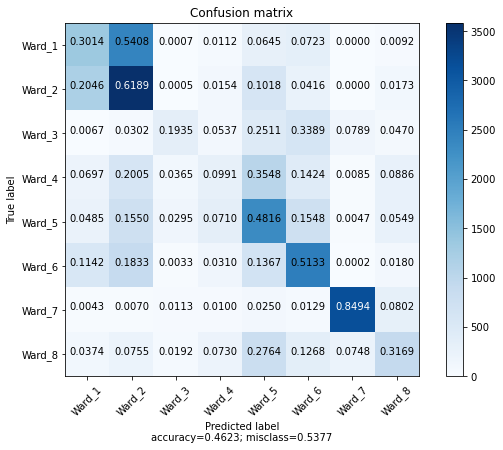

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[0], classes)

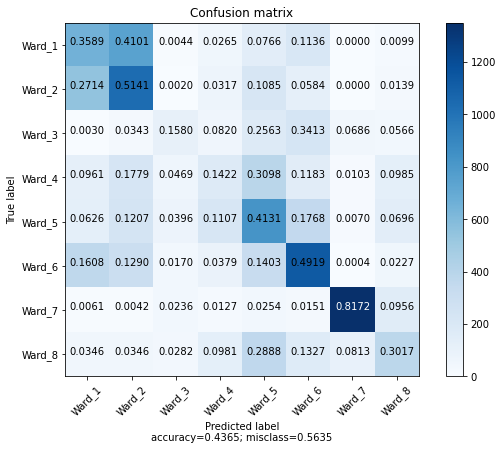

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[0], classes)

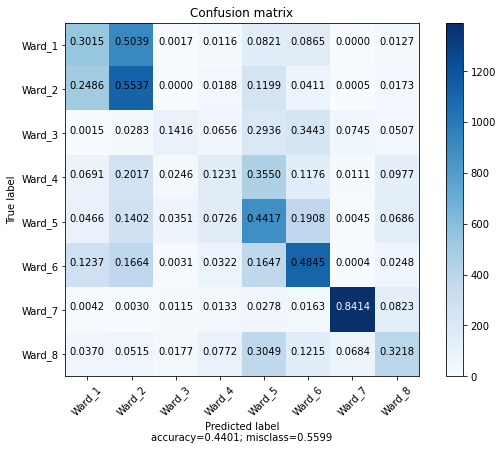

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[0], classes)

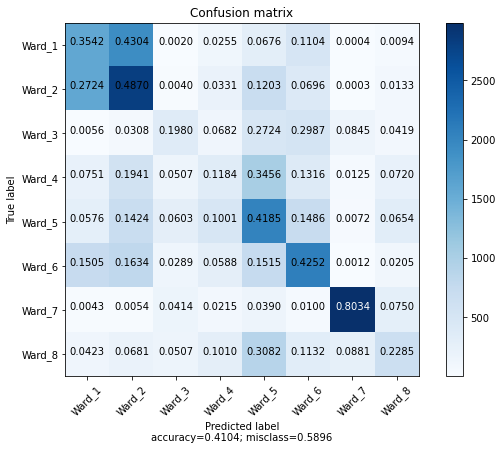

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[0], classes)

--------------------

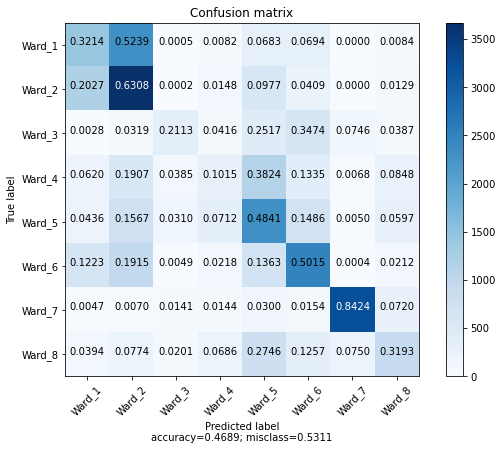

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[1], classes)

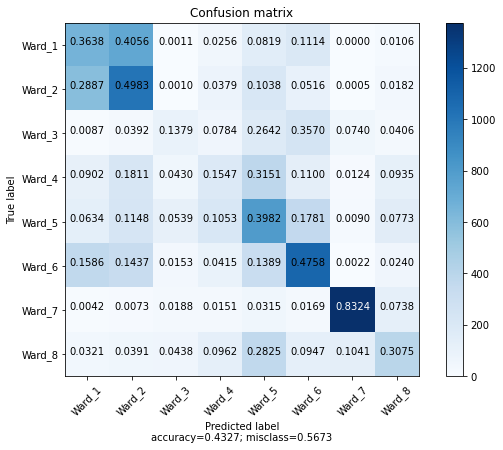

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[1], classes)

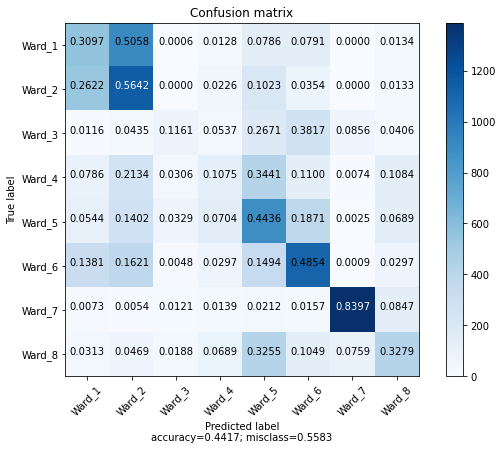

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[1], classes)

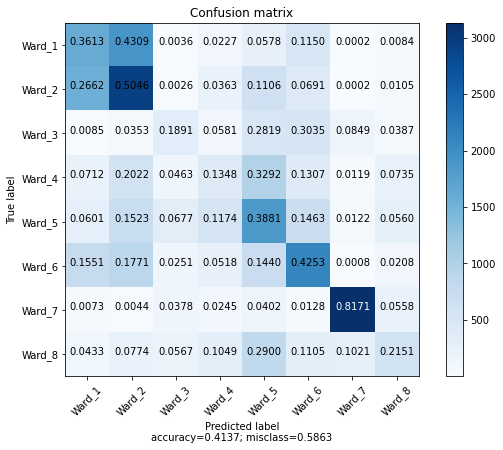

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[1], classes)

--------------------

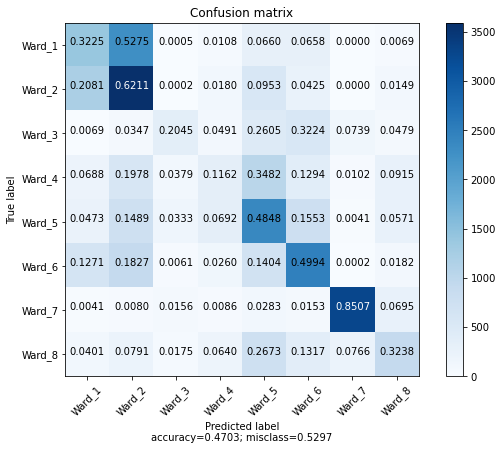

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[2], classes)

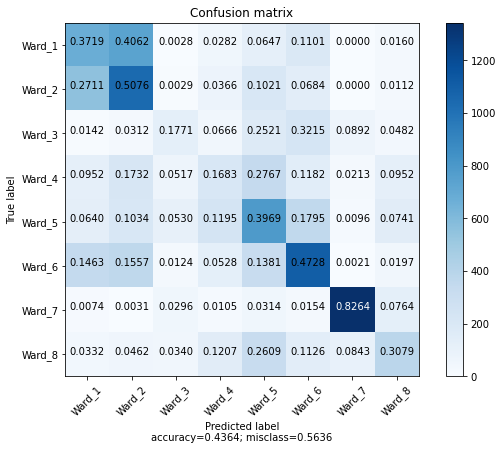

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[2], classes)

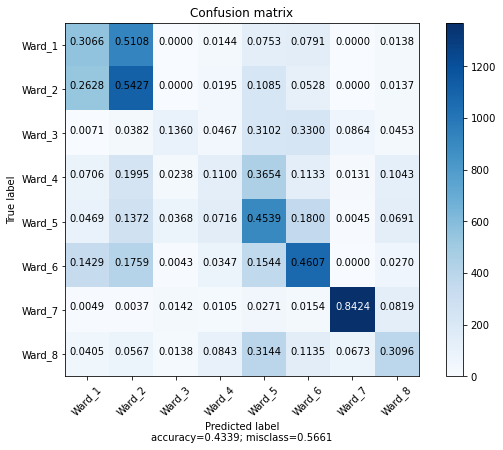

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[2], classes)

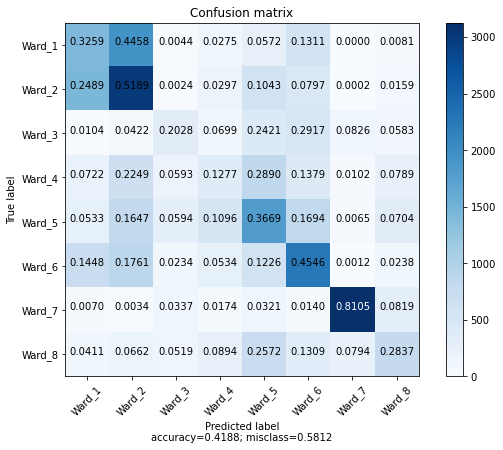

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[2], classes)

--------------------

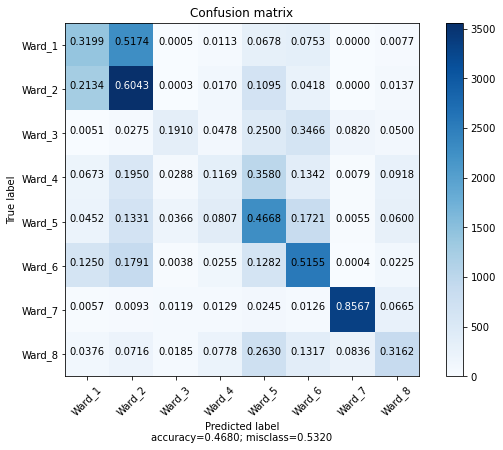

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[3], classes)

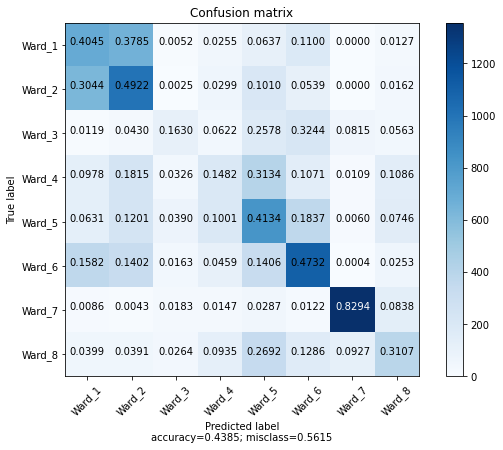

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[3], classes)

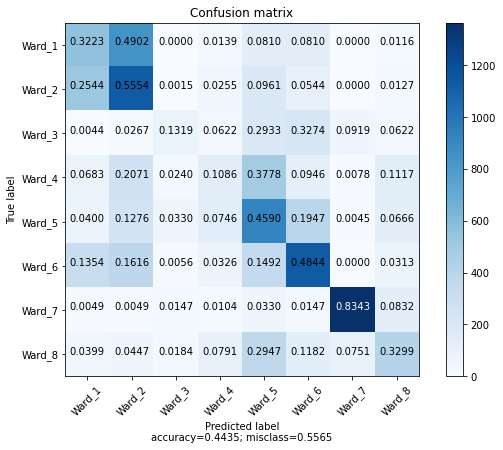

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[3], classes)

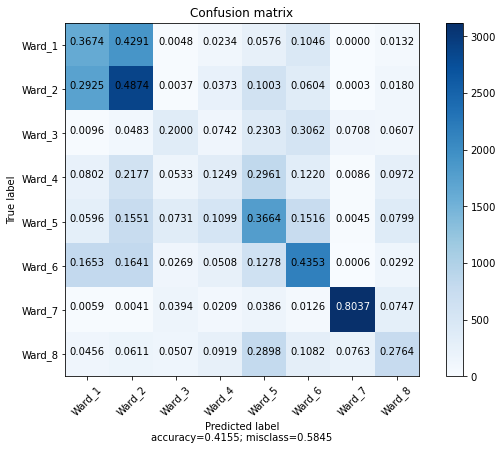

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[3], classes)

--------------------

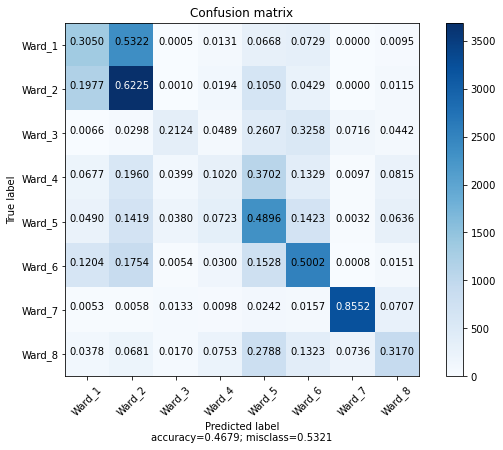

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_base[4], classes)

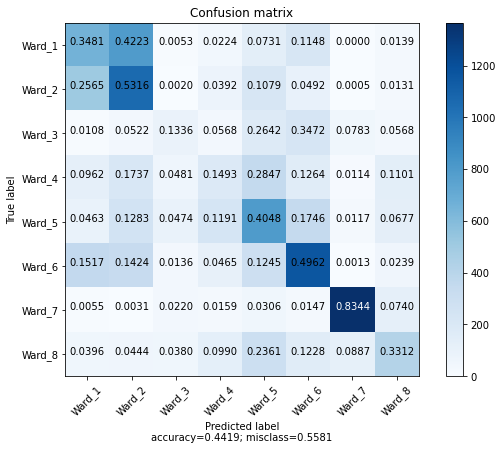

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_base[4], classes)

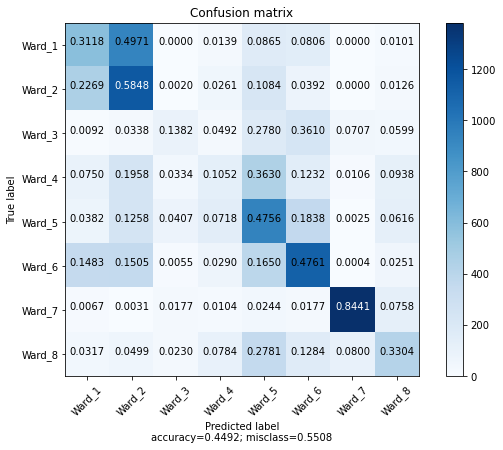

In [ ]:
plot_confusion_matrix(cm_lst_PRE_COVID_MODEL_ON_COVID_experiment[4], classes)

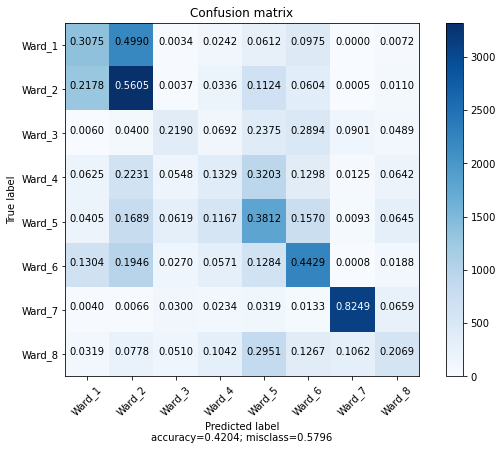

In [ ]:
plot_confusion_matrix(cm_lst_COVID_MODEL_ON_PRE_COVID_experiment[4], classes)

#### Feature Importance Comparsion between pre-COVID and COVID

0.31173643619855085
0.2382870955667146
0.13898926490907043
0.07406376552082786
0.06267122436476888
0.04128066472088213
0.032988164080898864
0.022514569251883297
0.01861613503276395
0.01647857703899199
0.013691071145212235
0.010901935132840001
0.007227133824793716
0.0029304553214425794
0.0022189423232493602
0.0013931818588833417
0.0008302615503565843
0.0005031863505210852
0.0004746271896839344
0.00033935606085741093
0.00028989263328217527
0.00024748219204663574
0.00021852866743669067
0.00018930253546377195
0.0001638297633196944
0.00014963137409322136
0.00013841690503853666
0.00010975190251872015
9.991304021095957e-05
9.072104920962326e-05
7.05887109271133e-05
5.267954359458234e-05
2.6832167179165937e-05
1.6382072486047072e-05


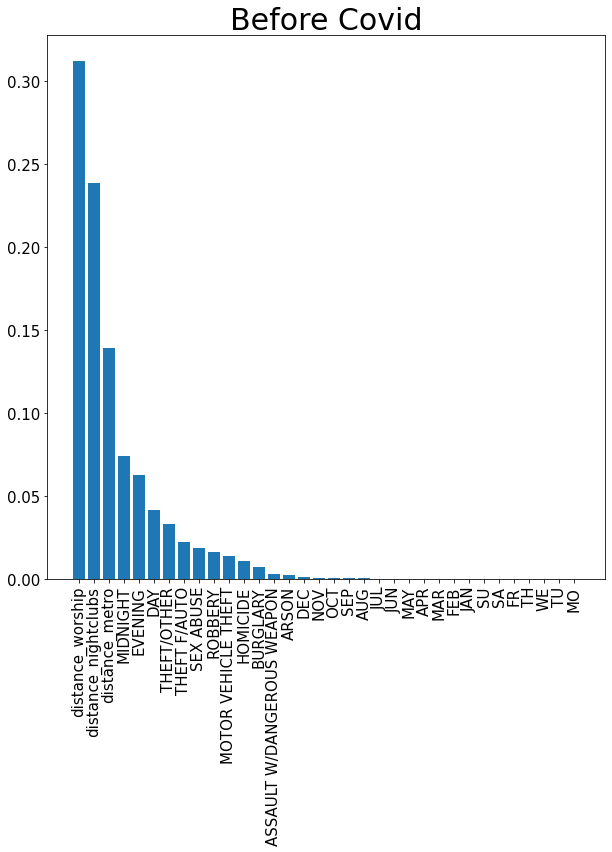

In [ ]:
preAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in preAvg:
    preAvg2 = np.add(preAvg2, i)


for i in range(len(preAvg2)):
    preAvg2[i] = preAvg2[i]/5
for i in preAvg2:
    print(i)

    
precovid_importance = []
for i in curr_X_test_PRE_COVID_unscaled_base.columns:
    precovid_importance.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(precovid_importance[::-1], preAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Before Covid', fontsize = 30)
plt.show()

0.34089352324236405
0.2241487207408388
0.13040226783887038
0.07575488400939431
0.06726739615849178
0.03732605231426018
0.032742694238306794
0.023954547344260203
0.01568587911576146
0.013124433123194112
0.008343964716657427
0.00641289773405678
0.005353594845133093
0.0040797072149019375
0.0035512437431442995
0.00294726522855276
0.0018716694539510543
0.0010765036158532579
0.0008781691076598667
0.0007294493434375394
0.0005621477654654429
0.0004451349743793519
0.0003870519687508353
0.00034707306544139307
0.0002844970669136209
0.00025641396375336036
0.0002229933548630447
0.000197126555106255
0.00016617478493204633
0.00015583305299845949
0.00011923590529584315
9.6647207826883e-05
7.611428692542394e-05
5.7751606169747206e-05
3.594366622001977e-05
2.5716319143823157e-05
1.4505708168885845e-05
4.775618555534104e-06


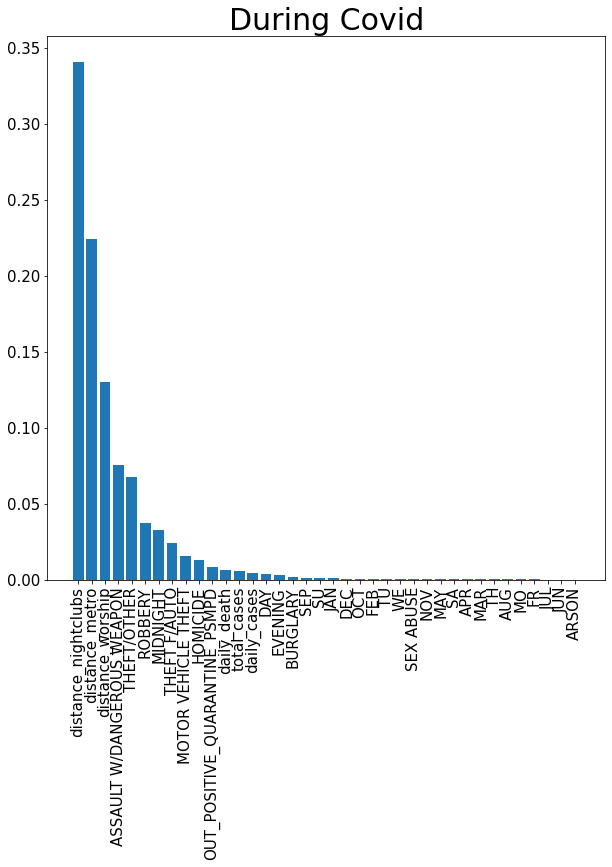

In [ ]:
postAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in postAvg:
    postAvg2 = np.add(postAvg2, i)


for i in range(len(postAvg2)):
    postAvg2[i] = postAvg2[i]/5
for i in postAvg2:
    print(i)

    
covid_importance = []
for i in importance.index:
    covid_importance.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(covid_importance, postAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('During Covid', fontsize = 30)
plt.show()